**Menganalisis Produktivitas Lingkungan dan Sumber Daya: Perbandingan antara Negara-Negara Maju dan Berkembang**

# **Importing Libraries**

In [ ]:
import pandas as pd # untuk manipulasi dan analisis data
import requests # untuk mengirim permintaan HTTP
import matplotlib.pyplot as plt # untuk visualisasi data
import seaborn as sns # untuk visualisasi data
import numpy as np # untuk komputasi numerik
from io import StringIO # untuk memproses string sebagai file
from sklearn.utils import resample # untuk sampling ulang data
from scipy import stats # untuk perhitungan statistik
from sklearn.preprocessing import OneHotEncoder # untuk encoding variabel kategori
plt.style.use('fivethirtyeight') # menetapkan gaya visualisasi
pd.set_option('display.float_format', '{:.2f}'.format) # untuk mengatur format tampilan angka desimal

# **Loading Data**

In [ ]:
# mendefinisikan url API untuk mengakses data lingkungan dari OECD
url = "https://sdmx.oecd.org/public/rest/data/OECD.ENV.EPI,DSD_GG@DF_GREEN_GROWTH,/PHL+VNM+IND+SGP+HKG+IDN+KOR+JPN.A.EAMFP_APAG+EAMFP_NKG+EAMFP_EAMFPG+EAMFP+PBAL_HA+NBAL_HA+MWAS_LANDF+MWAS_RECO+MWAS_INC+MWAS_INT+DMC_MET+DMC_MIN+DMC_BIO+DMC_PROD+MAT+RE_TPES_EBIOM+NRGC+RE_NRG+RE_TPES+NRGS+NRG_INT+NRG_PROD+NRG+GHG_DBEM+GHG_DBEMCAP+GHG_DBPROD_NNDI+GHG_DBPROD+GHG_PBEM+GHG_PBEMCAP+GHG_PBPROD+CO2_AIRTRAGDP+CO2_AIRTRACAP+CO2_DBEM+CO2_DBEMCAP+CO2_DBPROD+CO2_DBPROD_NNDI+CO2_PBEM+CO2_PBEMCAP+CO2_PBPROD+GHG+ENVRESPROD..?startPeriod=1990&endPeriod=2021&dimensionAtObservation=AllDimensions&format=csvfilewithlabels"

# mendefinisikan header untuk meminta data dalam format CSV
headers = {
    "Accept": "text/csv"
}

# mengirimkan permintaan GET untuk mengambil data
response = requests.get(url, headers=headers)

# memeriksa apakah permintaan berhasil
if response.status_code == 200:
    # Convert the CSV content into a pandas DataFrame
    data = StringIO(response.text)
    data = pd.read_csv(data)
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

***Output dari kode ini adalah sebuah DataFrame pandas yang berisi dataset yang diambil dari API OECD. Jika permintaan berhasil (status code 200), maka data CSV yang diterima akan dikonversi menjadi format yang dapat digunakan dalam analisis data menggunakan pandas. Jika gagal, pesan kesalahan dengan kode status akan dicetak, yang membantu dalam debugging dan memahami masalah yang terjadi saat mencoba mengambil data.***

# **Data Understanding**

In [ ]:
# menampilkan 5 baris (default) awal dari dataset
data.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,UNIT_MULT,Unit multiplier,PRICE_BASE,Price base,BASE_PER,Base period,TIMELINESS,Timeliness,DECIMALS,Decimals
0,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,IND,India,A,Annual,ENVRESPROD,Environmental and resource productivity,...,0,Units,_Z,Not applicable,NaN,NaN,1,"1 year lag, timely",2,Two
1,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,IND,India,A,Annual,ENVRESPROD,Environmental and resource productivity,...,0,Units,_Z,Not applicable,NaN,NaN,1,"1 year lag, timely",2,Two
2,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,IND,India,A,Annual,ENVRESPROD,Environmental and resource productivity,...,0,Units,_Z,Not applicable,NaN,NaN,1,"1 year lag, timely",2,Two
3,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,IND,India,A,Annual,ENVRESPROD,Environmental and resource productivity,...,0,Units,_Z,Not applicable,NaN,NaN,1,"1 year lag, timely",2,Two
4,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,IND,India,A,Annual,ENVRESPROD,Environmental and resource productivity,...,0,Units,_Z,Not applicable,NaN,NaN,1,"1 year lag, timely",2,Two


***Menunjukkan 5 entri awal dari data, termasuk kolom-kolom yang ada. Ini berguna untuk memberikan gambaran awal mengenai struktur dan isi data, sehingga kita dapat melihat tipe data, nama kolom, dan beberapa nilai yang terdapat dalam dataset. Dengan cara ini, kita bisa cepat menilai apakah data yang diambil sesuai dengan yang diharapkan dan siap untuk dianalisis lebih lanjut.***

In [ ]:
# menampilkan kolom apa saja yang dalam dataset
data.columns

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'Reference area', 'FREQ', 'Frequency of observation', 'MEASURE',
       'Measure', 'UNIT_MEASURE', 'Unit of measure', 'ACTIVITY',
       'Economic activity', 'TIME_PERIOD', 'Time period', 'OBS_VALUE',
       'Observation value', 'OBS_STATUS', 'Observation status', 'OBS_STATUS_2',
       'Observation status 2', 'UNIT_MULT', 'Unit multiplier', 'PRICE_BASE',
       'Price base', 'BASE_PER', 'Base period', 'TIMELINESS', 'Timeliness',
       'DECIMALS', 'Decimals'],
      dtype='object')

***Daftar nama kolom yang terdapat dalam data. Ini membantu dalam merencanakan analisis yang akan dilakukan, seperti memilih kolom tertentu untuk visualisasi, pengolahan data, atau perhitungan statistik.***

In [ ]:
# menampilkan nilai unik yang ada pada kolom tersebut secara beurutan
print(sorted(data['TIME_PERIOD'].unique()))

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


***Daftar nilai unik yang ada pada kolom `TIME_PERIOD`, ditampilkan dalam urutan yang terurut (ascending). Hal ini menunjukan bahwa kami memilih rentang antara 1990 sampai 2021. Dengan hal ini, kami dapat lebih baik dalam merencanakan analisis temporal, seperti tren waktu atau perbandingan antar periode.***

In [ ]:
# menampilkan nilai unik yang ada pada kolom tersebut secara beurutan
print(sorted(data['Reference area'].unique()))

['Hong Kong (China)', 'India', 'Indonesia', 'Japan', 'Korea', 'Philippines', 'Singapore', 'Viet Nam']


***Daftar ini menunjukkan `Reference area `yang kami pilih. Dengan informasi ini, kita bisa memahami `Reference area` yang dianalisis dalam data dan melakukan perbandingan antar negara atau wilayah tersebut.***

In [ ]:
# menampilkan nilai unik yang ada pada kolom tersebut secara beurutan
sorted(data['Measure'].unique())

['Adjustment for pollution abatement',
 'CO2 emissions from air transport per capita',
 'CO2 emissions from air transport per unit of GDP',
 'Consumption of biomass',
 'Consumption of metals',
 'Consumption of non-metallic minerals',
 'Contribution of natural capital',
 'Demand-based CO2 emissions',
 'Demand-based CO2 intensity energy-related CO2 per capita',
 'Demand-based CO2 productivity relative to disposable income',
 'Demand-based CO2 productivity, GDP per unit of energy-related CO2 emissions',
 'Demand-based GHG emissions',
 'Demand-based GHG intensity energy-related GHG per capita',
 'Demand-based GHG productivity relative to disposable income',
 'Demand-based GHG productivity, GDP per unit of energy-related GHG emissions',
 'Energy consumption',
 'Energy intensity per capita',
 'Energy productivity',
 'Energy productivity, GDP per unit of TES',
 'Environmental and resource productivity',
 'Environmentally adjusted multifactor productivity',
 'Environmentally adjusted multifact

***Daftar ini memberikan informasi terkait `Measure` yang kami pilih tentang berbagai aspek yang diukur terkait produktivitas lingkungan dan sumber daya.***

In [ ]:
# menampilkan informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12403 entries, 0 to 12402
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STRUCTURE                 12403 non-null  object 
 1   STRUCTURE_ID              12403 non-null  object 
 2   STRUCTURE_NAME            12403 non-null  object 
 3   ACTION                    12403 non-null  object 
 4   REF_AREA                  12403 non-null  object 
 5   Reference area            12403 non-null  object 
 6   FREQ                      12403 non-null  object 
 7   Frequency of observation  12403 non-null  object 
 8   MEASURE                   12403 non-null  object 
 9   Measure                   12403 non-null  object 
 10  UNIT_MEASURE              12403 non-null  object 
 11  Unit of measure           12403 non-null  object 
 12  ACTIVITY                  12403 non-null  object 
 13  Economic activity         12403 non-null  object 
 14  TIME_P

***Diketahui bahwa terdapat 11219  baris dan 32 kolom yang terdiri 10 kolom (float), 1 kolom (integer), dan 21 kolom (objek). serta, terdapat missing value dibeberapa kolom seperti OBS_VALUE, TIMELINESS, Base period, dll.***

In [ ]:
# memilih kolom yang relevan dari dataset
df = data[['Reference area','Measure','TIME_PERIOD','OBS_VALUE']]

***Dengan memilih kolom-kolom ini, dataframe menjadi lebih fokus dan ringkas, sehingga memudahkan analisis yang lebih spesifik pada `'Reference area','Measure','TIME_PERIOD','OBS_VALUE'`.***

In [ ]:
# menampilkan 5 baris (default) awal dari dataset
df.head()

,Reference area,Measure,TIME_PERIOD,OBS_VALUE
0,India,Environmental and resource productivity,2018,NaN
1,India,Environmental and resource productivity,1997,NaN
2,India,Environmental and resource productivity,1996,NaN
3,India,Environmental and resource productivity,1995,NaN
4,India,Environmental and resource productivity,1994,NaN


***Ditampilkan bahwa kolom sudah relevan dengan pilihan sebelumnya.***

In [ ]:
# mengganti nama kolom pada DataFrame
df.rename(columns={'TIME_PERIOD':'period','OBS_VALUE':'value','Reference area':'nation','Measure':'column_name'},inplace=True)

<ipython-input-11-e3132305e803>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'TIME_PERIOD':'period','OBS_VALUE':'value','Reference area':'nation','Measure':'column_name'},inplace=True)


***Perubahan nama kolom ini dilakukan untuk membuatnya lebih sederhana dan mudah dipahami. Dengan menggunakan nama-nama baru ini, kita dapat lebih efisien dalam menulis kode dan berinteraksi dengan dataframe.***

In [ ]:
# menampilkan 5 baris (default) awal dari dataset
df.head()

,nation,column_name,period,value
0,India,Environmental and resource productivity,2018,NaN
1,India,Environmental and resource productivity,1997,NaN
2,India,Environmental and resource productivity,1996,NaN
3,India,Environmental and resource productivity,1995,NaN
4,India,Environmental and resource productivity,1994,NaN


***Ditampilkan bahwa nama kolom sebelumnya sudah berubah sesuai pergantian pada `df.rename`.***

In [ ]:
# menampilkan ringkasan informasi tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12403 entries, 0 to 12402
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nation       12403 non-null  object 
 1   column_name  12403 non-null  object 
 2   period       12403 non-null  int64  
 3   value        8598 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 387.7+ KB


***Diketahui bahwa terdapat 11219 baris dan 4 kolom yang terdiri 1 kolom (float), 1 kolom (integer), dan 2 kolom (objek). serta, terdapat missing value dikolom `value`.***

In [ ]:
# menampilkan data statistik numerikal dari dataset
df.describe()

,period,value
count,12403.00,8598.00
mean,2005.98,912853.66
std,8.80,10099121.57
min,1990.00,-3678.20
25%,1999.00,3.29
50%,2006.00,21.46
75%,2014.00,98.66
max,2021.00,230981258.00


***Ini membantu untuk mendapatkan gambaran awal mengenai distribusi dan sebaran data dalam dataset sebelum melakukan analisis lebih lanjut.***
*   Kolom period menunjukkan rentang data dari tahun 1990 hingga 2021 dengan rata-rata tahun 2005.
*   Kolom value memiliki nilai rata-rata 372.01, dengan standar deviasi yang cukup besar (1659.69), menunjukkan adanya variasi yang cukup besar pada nilai observasi. Terdapat nilai negatif (minimum -62.44) dan nilai maksimum mencapai 19.824,85.

In [ ]:
# menampilkan data statistik kategorikal dari dataset
df.describe(include='object')

,nation,column_name
count,12403,12403
unique,8,41
top,Korea,Environmental and resource productivity
freq,1752,1536


***Menunjukkan statistik deskriptif untuk data kategorikal.***
*   Kolom `nation` memiliki 8 nilai unik dan `column_name` memiliki 41 nilai unik.
*   Nilai yang paling sering muncul (top) adalah `Korea` untuk nation sebanyak 1.712 kali dan `Environmental and resource productivity` untuk column_name sebanyak 1.344 kali.



In [ ]:
# menambahkan kolom baru 'development_status' berdasarkan mapping status negara
development_status_mapping = {
    'Hong Kong (China)':'Developed',
    'India':'Developing',
    'Indonesia':'Developing',
    'Japan':'Developed',
    'Korea':'Developed',
    'Philippines':'Developing',
    'Singapore':'Developed',
    'Viet Nam':'Developing'
}

df['development_status'] = df['nation'].map(development_status_mapping)

<ipython-input-16-5ba4424867bf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['development_status'] = df['nation'].map(development_status_mapping)


***Penambahan kolom baru `development_status` ke dalam DataFrame, di mana setiap negara dalam kolom nation dipetakan sebagai Developed (maju) atau Developing (berkembang) sesuai dengan mapping yang telah didefinisikan.***

sumber mapping:
*   https://worldpopulationreview.com/country-rankings/developed-countries
*   https://hdr.undp.org/data-center/human-development-index#/indicies/HDI


In [ ]:
# menampilkan 5 baris (default) awal dari dataset
df.head()

,nation,column_name,period,value,development_status
0,India,Environmental and resource productivity,2018,NaN,Developing
1,India,Environmental and resource productivity,1997,NaN,Developing
2,India,Environmental and resource productivity,1996,NaN,Developing
3,India,Environmental and resource productivity,1995,NaN,Developing
4,India,Environmental and resource productivity,1994,NaN,Developing


***Menampilkan 5 baris pertama dari DataFrame, yang terdiri dari kolom nation, column_name, period, value, dan kolom baru development_status. Di sini, terlihat bahwa India diidentifikasi sebagai negara Developing.***

In [ ]:
# membuat pivot table berdasarkan periode, status perkembangan, dan negara, dengan kolom diambil dari 'column_name' dan nilai diambil dari 'value'
df_pivot = df.pivot_table(index=['period','development_status','nation'],columns='column_name',values='value')

***Membuat pivot table yang mengelompokkan data berdasarkan `'period','development_status','nation`', serta mengorganisir kolom berdasarkan `column_name` dari dataset dengan `value` yang relevan, yang memungkinkan analisis terstruktur dari berbagai variabel dalam konteks masing-masing negara dan status perkembangan pada periode tertentu.***

In [ ]:
# menampilkan 8 baris pertama dari pivot table untuk melihat struktur data yang telah diproses
df_pivot.head(8)

column_name                                  Adjustment for pollution abatement  \
period development_status nation                                                  
1990   Developed          Hong Kong (China)                                 NaN   
                          Japan                                             NaN   
                          Korea                                             NaN   
                          Singapore                                         NaN   
       Developing         India                                             NaN   
                          Indonesia                                         NaN   
                          Philippines                                       NaN   
                          Viet Nam                                          NaN   

column_name                                  CO2 emissions from air transport per capita  \
period development_status nation                                                           
1990   Developed          Hong Kong (China)                                          NaN   
                          Japan                                                      NaN   
                          Korea                                                      NaN   
                          Singapore                                                  NaN   
       Developing         India                                                      NaN   
                          Indonesia                                                  NaN   
                          Philippines                                                NaN   
                          Viet Nam                                                   NaN   

column_name                                  CO2 emissions from air transport per unit of GDP  \
period development_status nation                                                                
1990   Developed          Hong Kong (China)                                               NaN   
                          Japan                                                           NaN   
                          Korea                                                           NaN   
                          Singapore                                                       NaN   
       Developing         India                                                           NaN   
                          Indonesia                                                       NaN   
                          Philippines                                                     NaN   
                          Viet Nam                                                        NaN   

column_name                                  Consumption of biomass  \
period development_status nation                                      
1990   Developed          Hong Kong (China)                    6.78   
                          Japan                               14.49   
                          Korea                               17.06   
                          Singapore                            4.97   
       Developing         India                               65.27   
                          Indonesia                           77.69   
                          Philippines                         56.82   
                          Viet Nam                            76.88   

column_name                                  Consumption of metals  \
period development_status nation                                     
1990   Developed          Hong Kong (China)                   3.89   
                          Japan                              11.28   
                          Korea                               6.85   
                          Singapore                           6.31   
       Developing         India                               1.44   
                          Indonesia                           4.24   
      

***Menunjukkan 8 baris pertama dari pivot table, di mana setiap baris mewakili kombinasi dari periode, status perkembangan, dan negara, dengan kolom-kolom yang berisi measure berbeda (dari column_name) terkait produktivitas lingkungan dan sumber daya, di mana banyak kolom dengan nilai-nilai yang tidak tersedia ditandai dengan NaN.***

In [ ]:
# mereset index pivot table agar kolom-kolom index menjadi kolom biasa
df_pivot.reset_index(inplace=True)

***Menjadikan kolom `'period','development_status','nation'` sebagai kolom biasa, sehingga memudahkan akses dan manipulasi data dalam DataFrame.***

In [ ]:
# menampilkan DataFrame pivot
df_pivot

column_name,period,development_status,nation,Adjustment for pollution abatement,CO2 emissions from air transport per capita,CO2 emissions from air transport per unit of GDP,Consumption of biomass,Consumption of metals,Consumption of non-metallic minerals,Contribution of natural capital,...,Production-based CO2 emissions,"Production-based CO2 intensity, energy-related CO2 per capita","Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions",Production-based GHG emissions,"Production-based GHG intensity, energy-related GHG per capita","Production-based GHG productivity, GDP per unit of energy-related GHG emissions",Renewable electricity generation,Renewable energy supply,Renewable energy supply (excluding solid biofuels),Total energy supply
0,1990,Developed,Hong Kong (China),NaN,NaN,NaN,6.78,3.89,89.33,NaN,...,59.06,NaN,NaN,NaN,NaN,NaN,NaN,5517.41,NaN,37.85
1,1990,Developed,Japan,NaN,NaN,NaN,14.49,11.28,74.23,NaN,...,571.66,NaN,NaN,NaN,NaN,NaN,11.35,7274339.92,2.37,260.80
2,1990,Developed,Korea,NaN,NaN,NaN,17.06,6.85,76.10,NaN,...,143.34,NaN,NaN,NaN,NaN,NaN,5.83,503251.21,0.62,68.84
3,1990,Developed,Singapore,NaN,NaN,NaN,4.97,6.31,88.73,NaN,...,48.88,NaN,NaN,NaN,NaN,NaN,0.54,17531.45,0.30,36.63
4,1990,Developing,India,NaN,NaN,NaN,65.27,1.44,33.29,NaN,...,294.85,NaN,NaN,NaN,NaN,NaN,24.77,57040376.01,2.20,173.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2021,Developed,Singapore,NaN,1405.38,9.93,3.32,1.69,95.00,NaN,...,76.84,11.42,12.38,NaN,NaN,NaN,2.86,203461.18,NaN,112.59
252,2021,Developing,India,NaN,8.39,1.25,44.92,3.68,51.40,NaN,...,1267.57,1.62,4.15,NaN,NaN,NaN,21.44,115490641.09,NaN,591.76
253,2021,Developing,Indonesia,NaN,15.34,1.29,62.51,6.96,30.53,NaN,...,387.41,2.04,5.84,NaN,NaN,NaN,19.01,27408750.21,NaN,204.26
254,2021,Developing,Philippines,NaN,15.32,1.93,29.76,3.87,66.36,NaN,...,166.07,1.17,6.79,NaN,NaN,NaN,22.11,10325418.10,NaN,107.40


***DataFrame pivot yang berisi data tentang berbagai measure (seperti Production-based CO2 emissions, Total energy supply, dan lainnya) untuk masing-masing nation dan period, dengan kolom-kolom terpisah untuk development_status (Developed atau Developing), memungkinkan analisis yang lebih terstruktur dan komprehensif.***

In [ ]:
# mengatur kolom 'period' sebagai indeks untuk DataFrame df_pivot
df_univ = df_pivot.set_index('period')

***DataFrame `df_pivot` dengan menjadikan kolom `period` sebagai indeks, sehingga memudahkan analisis dan manipulasi data berdasarkan tahun serta memungkinkan akses yang lebih efisien terhadap data terkait untuk masing-masing tahun.***

In [ ]:
# menampilkan dataframe univ
df_univ

column_name,development_status,nation,Adjustment for pollution abatement,CO2 emissions from air transport per capita,CO2 emissions from air transport per unit of GDP,Consumption of biomass,Consumption of metals,Consumption of non-metallic minerals,Contribution of natural capital,Demand-based CO2 emissions,...,Production-based CO2 emissions,"Production-based CO2 intensity, energy-related CO2 per capita","Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions",Production-based GHG emissions,"Production-based GHG intensity, energy-related GHG per capita","Production-based GHG productivity, GDP per unit of energy-related GHG emissions",Renewable electricity generation,Renewable energy supply,Renewable energy supply (excluding solid biofuels),Total energy supply
period,,,,,,,,,,,,,,,,,,,,,
1990,Developed,Hong Kong (China),NaN,NaN,NaN,6.78,3.89,89.33,NaN,NaN,...,59.06,NaN,NaN,NaN,NaN,NaN,NaN,5517.41,NaN,37.85
1990,Developed,Japan,NaN,NaN,NaN,14.49,11.28,74.23,NaN,NaN,...,571.66,NaN,NaN,NaN,NaN,NaN,11.35,7274339.92,2.37,260.80
1990,Developed,Korea,NaN,NaN,NaN,17.06,6.85,76.10,NaN,NaN,...,143.34,NaN,NaN,NaN,NaN,NaN,5.83,503251.21,0.62,68.84
1990,Developed,Singapore,NaN,NaN,NaN,4.97,6.31,88.73,NaN,NaN,...,48.88,NaN,NaN,NaN,NaN,NaN,0.54,17531.45,0.30,36.63
1990,Developing,India,NaN,NaN,NaN,65.27,1.44,33.29,NaN,NaN,...,294.85,NaN,NaN,NaN,NaN,NaN,24.77,57040376.01,2.20,173.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,Developed,Singapore,NaN,1405.38,9.93,3.32,1.69,95.00,NaN,NaN,...,76.84,11.42,12.38,NaN,NaN,NaN,2.86,203461.18,NaN,112.59
2021,Developing,India,NaN,8.39,1.25,44.92,3.68,51.40,NaN,NaN,...,1267.57,1.62,4.15,NaN,NaN,NaN,21.44,115490641.09,NaN,591.76
2021,Developing,Indonesia,NaN,15.34,1.29,62.51,6.96,30.53,NaN,NaN,...,387.41,2.04,5.84,NaN,NaN,NaN,19.01,27408750.21,NaN,204.26


***DataFrame `df_univ`, di mana kolom period dijadikan sebagai indeks, sehingga data yang berkaitan dengan emisi dan konsumsi diorganisir berdasarkan tahun, dengan rincian status pembangunan dan nama negara. Data ini mencakup informasi penting untuk analisis tren emisi dan penggunaan sumber daya dari tahun 1990 hingga 2021.***

In [ ]:
# menampilkan ringkasan informasi tentang DataFrame
df_univ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 1990 to 2021
Data columns (total 38 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   development_status                                                               256 non-null    object 
 1   nation                                                                           256 non-null    object 
 2   Adjustment for pollution abatement                                               90 non-null     float64
 3   CO2 emissions from air transport per capita                                      72 non-null     float64
 4   CO2 emissions from air transport per unit of GDP                                 72 non-null     float64
 5   Consumption of biomass                                                           256 non-null    float64
 6   Consumption

***DataFrame yang memiliki 256 entri dan 38 kolom, di mana sebagian besar kolom berisi data numerik (float64) terkait emisi dan konsumsi sumber daya, sementara hanya dua kolom yang bertipe objek, yaitu development_status dan nation, dengan banyaknya nilai non-null yang bervariasi di setiap kolom, menunjukkan adanya missing values dalam dataframe.***

In [ ]:
# menampilkan data statistik numerikal dari dataframe
df_univ.describe()

column_name,Adjustment for pollution abatement,CO2 emissions from air transport per capita,CO2 emissions from air transport per unit of GDP,Consumption of biomass,Consumption of metals,Consumption of non-metallic minerals,Contribution of natural capital,Demand-based CO2 emissions,Demand-based CO2 intensity energy-related CO2 per capita,Demand-based CO2 productivity relative to disposable income,...,Production-based CO2 emissions,"Production-based CO2 intensity, energy-related CO2 per capita","Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions",Production-based GHG emissions,"Production-based GHG intensity, energy-related GHG per capita","Production-based GHG productivity, GDP per unit of energy-related GHG emissions",Renewable electricity generation,Renewable energy supply,Renewable energy supply (excluding solid biofuels),Total energy supply
count,90.00,72.00,72.00,256.00,256.00,256.00,90.00,168.00,168.00,48.00,...,256.00,216.00,216.00,208.00,208.00,208.00,240.00,256.00,219.00,256.00
mean,-0.44,782.16,11.89,31.19,7.34,61.47,0.04,346.44,6.91,2.47,...,283.40,5.17,5.45,376.96,8.52,3.07,17.17,15323044.74,5.70,154.73
std,1.07,1298.65,13.42,23.85,4.80,24.40,0.15,290.46,7.49,0.36,...,273.03,4.26,2.26,337.93,8.50,0.78,17.04,25118576.77,7.10,115.66
min,-4.01,6.63,1.07,0.92,0.15,17.10,-0.37,49.30,0.41,1.67,...,27.85,0.38,2.23,64.45,1.21,1.71,0.00,-1839.12,0.20,36.63
25%,-1.07,38.79,3.94,11.51,3.26,35.01,0.00,106.27,1.09,2.27,...,74.86,1.16,3.92,122.16,2.02,2.43,1.75,204858.16,1.11,66.70
50%,-0.42,91.00,6.08,19.29,6.79,71.60,0.00,256.60,1.79,2.50,...,177.77,3.80,4.93,264.05,6.67,3.03,13.52,7768091.86,2.43,112.04
75%,0.27,545.37,11.22,56.57,11.15,81.04,0.06,475.74,11.50,2.63,...,387.27,9.13,6.62,576.56,11.15,3.63,24.29,14536077.63,7.02,213.63
max,3.73,4177.89,46.59,77.69,25.09,97.45,0.82,1237.89,25.99,3.25,...,1288.27,12.87,12.72,1631.09,36.79,6.18,75.22,115490641.09,27.36,591.76


***Menunjukkan variasi dan distribusi data pada masing-masing kolom, seperti Production-based CO2 emissions dan Total energy supply, serta memberikan gambaran umum tentang rentang nilai yang terukur di dalam dataset.***


*   Production-based CO2 emissions memiliki nilai tertinggi mencapai 1288.27, dengan rata-rata 283.40 dan deviasi standar 273.03.
*   Total energy supply memiliki nilai maksimum 574.56 dan rata-rata 169.03, yang menunjukkan adanya variasi yang signifikan dalam emisi CO2 dan penggunaan energi di berbagai negara serta periode.


# **C.1 Data Preparation**

## 1. Missing Value

In [ ]:
# menghitung jumlah missing values
missing_count = df_univ.isnull().sum()

# menghitung persentase missing values
missing_percentage = df_univ.isnull().sum() / len(df_univ) * 100

# membuat DataFrame baru untuk menampilkan jumlah dan persentase berdampingan
missing_data = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percentage
})

# menampilkan hasil
missing_data

,Missing Values,Percentage (%)
column_name,,
development_status,0,0.00
nation,0,0.00
Adjustment for pollution abatement,166,64.84
CO2 emissions from air transport per capita,184,71.88
CO2 emissions from air transport per unit of GDP,184,71.88
Consumption of biomass,0,0.00
Consumption of metals,0,0.00
Consumption of non-metallic minerals,0,0.00
Contribution of natural capital,166,64.84


***Menunjukkan bahwa ada beberapa kolom yang memiliki missing value, ada kebutuhan untuk menangani missing value agar analisis lebih akurat dan dapat diandalkan.***

In [ ]:
# menghitung persentase missing value untuk setiap kolom
missing_percentage = df_univ.isnull().sum() / len(df_univ) * 100

# mengidentifikasi kolom dengan missing value lebih dari 30%
columns_to_drop = missing_percentage[missing_percentage > 30].index

# menghapus kolom-kolom tersebut
df_cleaned = df_univ.drop(columns=columns_to_drop)

***Menghitung persentase nilai hilang di setiap kolom DataFrame `df_univ` dan kemudian menghapus kolom-kolom yang memiliki persentase nilai hilang lebih dari 30%. Ini merupakan langkah pembersihan data yang penting untuk memastikan bahwa analisis yang dilakukan di masa depan lebih akurat dan tidak dipengaruhi oleh data yang tidak lengkap. Setelah menjalankan kode ini, `df_cleaned` akan berisi kolom-kolom yang lebih bersih, meningkatkan kualitas data yang digunakan untuk analisis selanjutnya.***

In [ ]:
# menghitung jumlah missing values
missing_count = df_cleaned.isnull().sum()

# menghitung persentase missing values
missing_percentage = df_cleaned.isnull().sum() / len(df_cleaned) * 100

# membuat DataFrame baru untuk menampilkan jumlah dan persentase berdampingan
missing_data = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percentage
})

# menampilkan hasil
missing_data

,Missing Values,Percentage (%)
column_name,,
development_status,0,0.00
nation,0,0.00
Consumption of biomass,0,0.00
Consumption of metals,0,0.00
Consumption of non-metallic minerals,0,0.00
Demand-based GHG emissions,48,18.75
Demand-based GHG intensity energy-related GHG per capita,48,18.75
"Demand-based GHG productivity, GDP per unit of energy-related GHG emissions",48,18.75
Energy consumption,0,0.00


***Menunjukkan bahwa kolom yang sebelumnya memiliki missing value lebih dari 30% telah hilang, sekarang hanya menampilkan beberapa kolom yang memiliki missing value kurang dari 30%, untuk penanganan selanjutnya yang lebih baik ***

In [ ]:
# mengisi missing values untuk kolom numerik berdasarkan unit_measure
for column in df_cleaned.select_dtypes(include=['number']).columns:
    df_cleaned[column] = df_cleaned[column].transform(lambda x: x.fillna(x.median()))

# mengisi missing values dengan modus untuk kolom kategorikal
for column in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].mode()[0])

***Mengisi nilai hilang pada kolom numerik dengan median karena lebih tahan terhadap outlier dan memberikan representasi yang lebih akurat untuk distribusi data yang tidak normal. Sementara itu, menggunakan modus untuk kolom kategorikal memastikan bahwa nilai yang paling umum tetap dipertahankan, meningkatkan konsistensi data.***

In [ ]:
# menghitung jumlah missing values
missing_count = df_cleaned.isnull().sum()

# menghitung persentase missing values
missing_percentage = df_cleaned.isnull().sum() / len(df_cleaned) * 100

# membuat DataFrame baru untuk menampilkan jumlah dan persentase berdampingan
missing_data = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percentage
})

# menampilkan hasil
missing_data

,Missing Values,Percentage (%)
column_name,,
development_status,0,0.00
nation,0,0.00
Consumption of biomass,0,0.00
Consumption of metals,0,0.00
Consumption of non-metallic minerals,0,0.00
Demand-based GHG emissions,0,0.00
Demand-based GHG intensity energy-related GHG per capita,0,0.00
"Demand-based GHG productivity, GDP per unit of energy-related GHG emissions",0,0.00
Energy consumption,0,0.00


***Data sudah bersih dari missing value, seperti yang ditunjukkan oleh hasil yang menunjukkan semua kolom tidak memiliki missing values. Data yang bersih dan terstruktur akan membantu menghasilkan insight yang lebih akurat dan dapat diandalkan.***

## 2. Duplicate Value

In [ ]:
# mengecek nilai yang duplikat
df_cleaned.duplicated().sum()

0

***Tidak ada duplikasi dalam dataset yang telah dibersihkan, yang menunjukkan bahwa setiap baris data adalah unik.***

## 3. Outlier

In [ ]:
# menampilkan data statistik numerikal dari dataset
df_cleaned.describe()

column_name,Consumption of biomass,Consumption of metals,Consumption of non-metallic minerals,Demand-based GHG emissions,Demand-based GHG intensity energy-related GHG per capita,"Demand-based GHG productivity, GDP per unit of energy-related GHG emissions",Energy consumption,Energy intensity per capita,"Energy productivity, GDP per unit of TES",Nitrogen balance,...,Production-based CO2 emissions,"Production-based CO2 intensity, energy-related CO2 per capita","Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions",Production-based GHG emissions,"Production-based GHG intensity, energy-related GHG per capita","Production-based GHG productivity, GDP per unit of energy-related GHG emissions",Renewable electricity generation,Renewable energy supply,Renewable energy supply (excluding solid biofuels),Total energy supply
count,256.00,256.00,256.00,256.00,256.00,256.00,256.00,256.00,256.00,256.00,...,256.00,256.00,256.00,256.00,256.00,256.00,256.00,256.00,256.00,256.00
mean,31.19,7.34,61.47,371.14,8.41,2.89,20.00,2.22,11517.86,111.31,...,283.40,4.96,5.37,355.79,8.18,3.06,16.94,15323044.74,5.22,154.73
std,23.85,4.80,24.40,329.33,6.91,0.76,0.00,2.15,5066.43,65.78,...,273.03,3.94,2.09,307.65,7.69,0.70,16.52,25118576.77,6.67,115.66
min,0.92,0.15,17.10,70.06,1.15,1.63,20.00,0.30,5409.39,-68.25,...,27.85,0.38,2.23,64.45,1.21,1.71,0.00,-1839.12,0.20,36.63
25%,11.51,3.26,35.01,127.43,2.16,2.52,20.00,0.60,9158.06,82.58,...,74.86,1.29,4.10,138.14,2.23,2.51,1.95,204858.16,1.56,66.70
50%,19.29,6.79,71.60,255.55,5.66,2.77,20.00,1.30,9910.32,115.50,...,177.77,3.80,4.93,264.05,6.67,3.03,13.52,7768091.86,2.43,112.04
75%,56.57,11.15,81.04,417.11,13.54,3.03,20.00,3.67,12690.05,151.70,...,387.27,8.97,6.08,413.30,10.25,3.50,22.35,14536077.63,4.74,213.63
max,77.69,25.09,97.45,1605.75,25.37,7.26,20.00,9.00,33077.40,245.89,...,1288.27,12.87,12.72,1631.09,36.79,6.18,75.22,115490641.09,27.36,591.76


***Kolom seperti Production-based CO2 emissions menunjukkan adanya outlier yang signifikan. Ini bisa mempengaruhi analisis lebih lanjut, sehingga penting untuk memutuskan apakah outlier ini akan dihapus atau dianalisis lebih lanjut berdasarkan konteks.***

<Axes: >

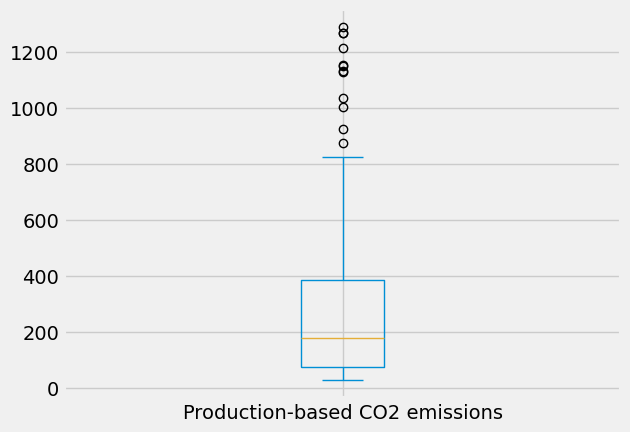

In [ ]:
# membuat boxplot untuk kolom 'Production-based CO2 emissions' untuk memvisualisasikan distribusi data dan mendeteksi outlier.
df_cleaned['Production-based CO2 emissions'].plot(kind='box')

***Boxplot menunjukkan adanya outlier yang signifikan pada nilai emisi CO2 yang dihasilkan dari produksi, dengan rentang data yang mayoritas terkonsentrasi di bawah 400, sementara beberapa nilai mencapai lebih dari 1200.***

<Axes: ylabel='Production-based CO2 emissions'>

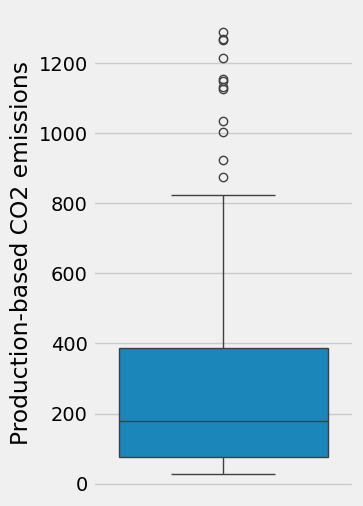

In [ ]:
# membuat boxplot untuk kolom 'Production-based CO2 emissions' dengan ukuran frame 3x6 inci, menggunakan Seaborn untuk visualisasi yang lebih menarik
fig, ax = plt.subplots(figsize=(3,6)) #buat frame/figure
sns.boxplot(data=df_cleaned['Production-based CO2 emissions'])

***Terlihat bahwa mayoritas nilai berada diantara 100 sampai 400, namun terdapat beberapa outlier dengan nilai di atas 800.***

In [ ]:
# membuat salinan DataFrame yang hanya berisi kolom 'Production-based CO2 emissions' untuk analisis lebih lanjut
df_obs = df_cleaned[['Production-based CO2 emissions']].copy()

***Membuat salinan terpisah dari kolom emisi CO2 berdasarkan produksi, memungkinkan analisis lebih lanjut tanpa mempengaruhi DataFrame asli, sehingga menjaga integritas data.***

In [ ]:
# menampilkan lima baris pertama dari DataFrame df_obs untuk melihat data yang telah disalin
df_obs.head()

column_name,Production-based CO2 emissions
period,
1990,59.06
1990,571.66
1990,143.34
1990,48.88
1990,294.85


***Variasi emisi yang tinggi dalam periode yang sama mungkin mencerminkan perbedaan dalam aktivitas industri, regulasi lingkungan, atau penggunaan sumber daya di berbagai lokasi, yang bisa menjadi fokus analisis lebih lanjut untuk memahami penyebab dan implikasinya.***

### Z-Score

In [ ]:
# menghitung Z-Score
data_zscore=df_obs[(np.abs(stats.zscore(df_obs)) < 3).all(axis=1)]

***Menghitung Z-Score untuk setiap nilai dalam DataFrame `df_obs` dan menyaring outlier dengan menghapus semua baris yang memiliki nilai Z-Score lebih besar dari 3 dalam kolom 'Production-based CO2 emissions', yang mengindikasikan bahwa nilai tersebut lebih dari tiga standar deviasi dari rata-rata.***

<Axes: xlabel='column_name'>

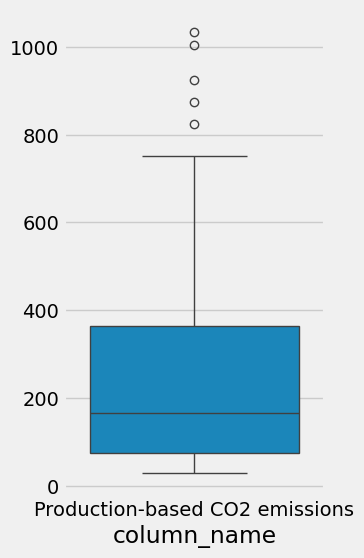

In [ ]:
fig, ax = plt.subplots(figsize=(3,6)) #buat frame/figure
sns.boxplot(data=data_zscore)

***Menunjukkan distribusi data untuk variabel "Production-based CO2 emissions" setelah menghilangkan outlier, dengan beberapa data tetap terdeteksi di luar batas atas, mengindikasikan variabilitas yang cukup besar dalam emisi CO2.***

### IQR

In [ ]:
#cari Q1, Q3, dan interquartile range
Q1 = df_obs.quantile(q=.25)
Q3 = df_obs.quantile(q=.75)
IQR = df_obs.apply(stats.iqr) #IQR=Q3-Q1 atau bisa menggunakan stats.iqr dari scipy

#ambil nilai antara 1.5*IQR dari Q1 dan Q3 aja
data_iqr = df_obs[~((df_obs< (Q1-1.5*IQR)) | (df_obs > (Q3+1.5*IQR))).any(axis=1)]

***Data yang difilter hanya menyisakan nilai-nilai yang berada dalam batas normal (1.5 * IQR dari Q1 dan Q3), sehingga outlier yang berada di luar batas tersebut tidak termasuk dalam hasil akhir.***

<Axes: xlabel='column_name'>

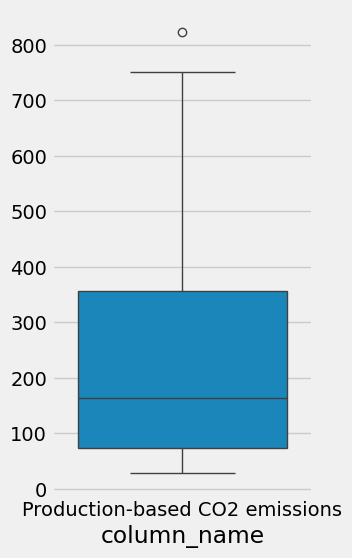

In [ ]:
# membuat frame/figure menggunakan matplotlib dengan ukuran (3,6) dan menampilkan boxplot dari data yang telah dibersihkan dari outlier berdasarkan Z-score
fig, ax = plt.subplots(figsize=(3,6)) #buat frame/figure
sns.boxplot(data=data_iqr)

***Plot ini menunjukkan distribusi "Production-based CO2 emissions" setelah menghapus outlier berdasarkan IQR, dengan tampilan yang lebih fokus pada data di dalam rentang normal.***

### Compare

In [ ]:
# mengubah nama kolom
data_zscore.columns = ['Z-Score']
data_iqr.columns = ['IQR']

***Kolom pada kedua dataframe diubah namanya agar lebih jelas, masing-masing menunjukkan data yang telah dibersihkan dari outlier berdasarkan Z-Score dan IQR.***

In [ ]:
# reset indeks semua dataframe sebelum digabungkan
hasil = pd.concat([df_obs.reset_index(drop=True),
                   data_zscore.reset_index(drop=True),
                   data_iqr.reset_index(drop=True)],
                  axis=1)

In [ ]:
# menmapilkan data statistik
hasil.describe()

,Production-based CO2 emissions,Z-Score,IQR
count,256.00,248.00,244.00
mean,283.40,253.83,242.27
std,273.03,220.76,202.85
min,27.85,27.85,27.85
25%,74.86,74.55,74.43
50%,177.77,166.08,163.40
75%,387.27,364.18,356.86
max,1288.27,1034.62,823.78


***Nilai Z-Score dan IQR yang lebih rendah mengindikasikan bahwa data tersebut lebih terdistribusi secara merata di sekitar nilai tengahnya, dengan adanya potensi outlier pada emisi CO2.***

<Axes: xlabel='Production-based CO2 emissions', ylabel='Density'>

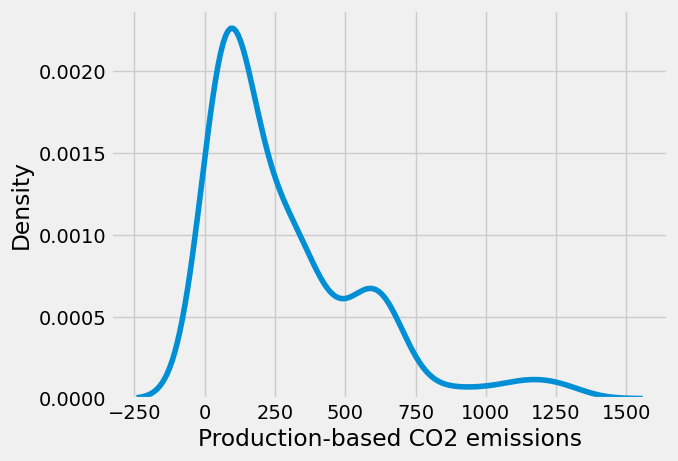

In [ ]:
# menggunakan seaborn untuk membuat plot kerapatan (KDE) dari emisi CO2 berbasis produksi
sns.kdeplot(data=hasil['Production-based CO2 emissions'])

***Menunjukkan bahwa distribusi emisi CO2 berdasarkan produksi cenderung memiliki puncak di sekitar nilai rendah, dengan penurunan yang bertahap menuju nilai lebih tinggi, mengindikasikan bahwa sebagian besar negara menghasilkan emisi CO2 yang lebih rendah, sementara emisi yang sangat tinggi cenderung lebih jarang terjadi.***

<Axes: >

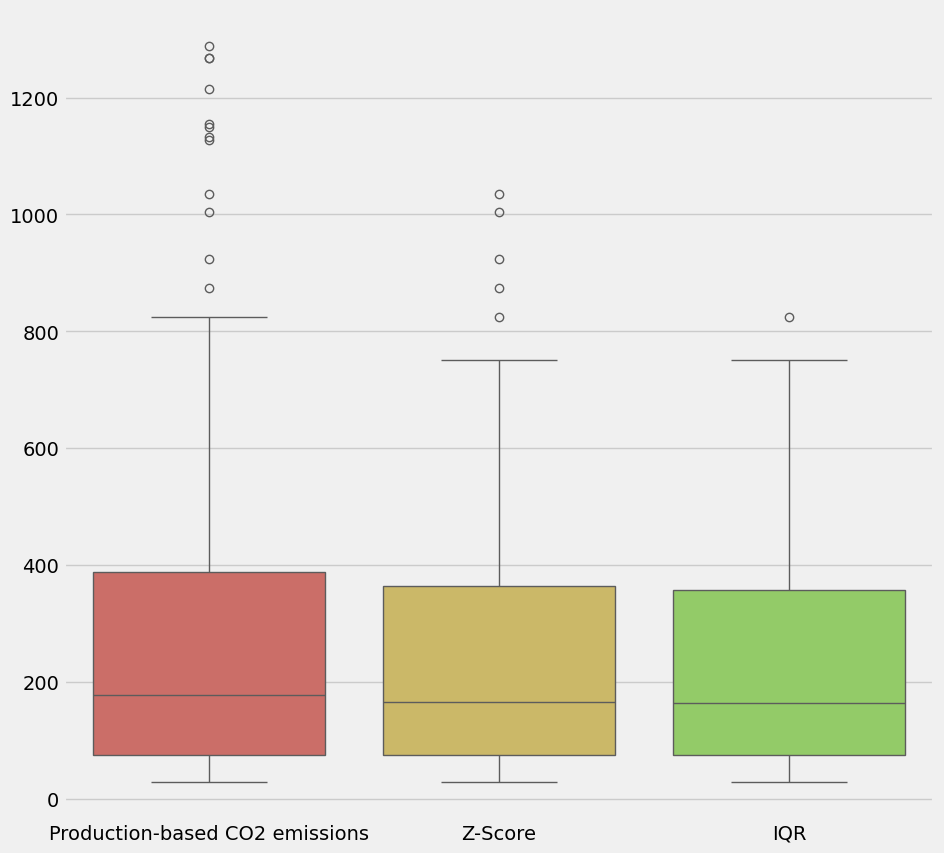

In [ ]:
# membuat box plot untuk menunjukkan distribusi data pada ketiga variabel: emisi CO2 berbasis produksi, Z-Score, dan IQR.
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=hasil, palette=('#db5f57', '#dbc257', '#91db57'))

***Menunjukkan bahwa emisi CO2 berbasis produksi memiliki rentang yang lebih sempit dan median yang lebih rendah dibandingkan dengan Z-Score dan IQR, yang memiliki rentang yang lebih luas dan median yang lebih tinggi.***

> Keputusan yang kami ambil adalah mempertahankan outlier dalam dataset ini adalah langkah yang tepat karena adanya keberagaman negara dan menggali lebih dalam ke dalam perbedaan struktural yang ada. Jika outlier dihilangkan, mungkin kehilangan wawasan penting yang sebenarnya merefleksikan kondisi negara-negara tersebut.

## 4. Imbalance Data

In [ ]:
# menghitung jumlah frekuensi untuk setiap kategori dalam kolom development_status
df_cleaned['development_status'].value_counts()

,count
development_status,
Developed,128
Developing,128


***Menunjukkan bahwa jumlah negara yang termasuk dalam kategori "Developed" dan "Developing" adalah sama, masing-masing 128, yang mengindikasikan keseimbangan antara kedua kelompok dalam dataset ini.***

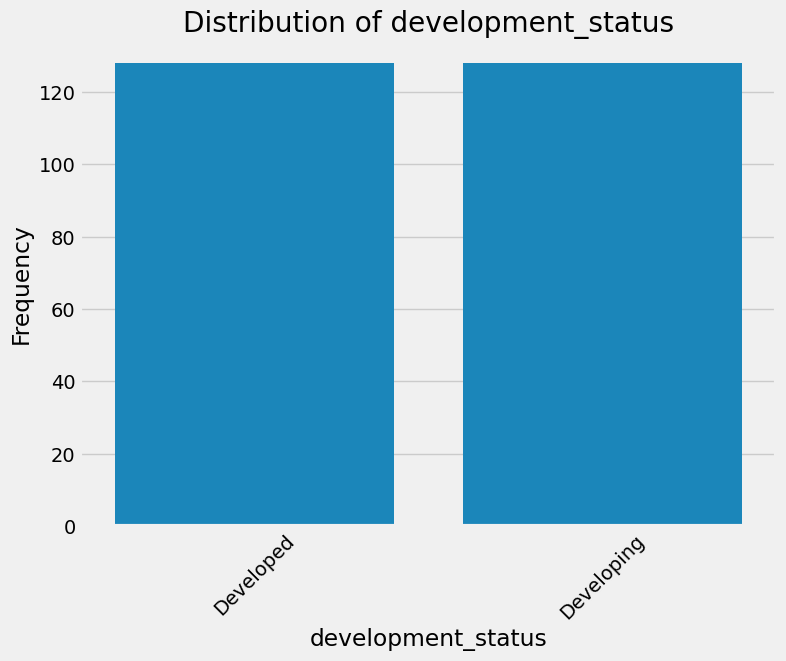

In [ ]:
# menentukan kolom yang akan diplot, di sini menggunakan 'development_status'
column = 'development_status'

plt.figure(figsize=(8, 6))
ax = sns.countplot(x=column, data=df_cleaned)

# menambahkan judul dan label pada sumbu x dan y
plt.title(f'Distribution of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

***Grafik menunjukkan bahwa nilai 'Developed' dan 'Developing' memiliki frekuensi yang sama. Ini berarti bahwa distribusi nilai di kolom 'development_status' adalah sama untuk kedua nilai tersebut.***

## 5. Feature Encoding

In [ ]:
# inisialisasi OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# melakukan encoding pada kolom 'development_status'
encoded_data = encoder.fit_transform(df_cleaned[['development_status']])

# mengubah data encoded menjadi DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['development_status']), index=df_cleaned.index)
# Added index=df_cleaned.index to ensure encoded_df has the same index as df_cleaned

# menggabungkan DataFrame hasil encoding dengan DataFrame asli
df_encoded = pd.concat([df_cleaned, encoded_df], axis=1)

# menghapus kolom 'development_status' asli
df_encoded.drop('development_status', axis=1, inplace=True)

# menampilkan DataFrame yang telah di-encode
df_encoded

,nation,Consumption of biomass,Consumption of metals,Consumption of non-metallic minerals,Demand-based GHG emissions,Demand-based GHG intensity energy-related GHG per capita,"Demand-based GHG productivity, GDP per unit of energy-related GHG emissions",Energy consumption,Energy intensity per capita,"Energy productivity, GDP per unit of TES",...,"Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions",Production-based GHG emissions,"Production-based GHG intensity, energy-related GHG per capita","Production-based GHG productivity, GDP per unit of energy-related GHG emissions",Renewable electricity generation,Renewable energy supply,Renewable energy supply (excluding solid biofuels),Total energy supply,development_status_Developed,development_status_Developing
period,,,,,,,,,,,,,,,,,,,,,
1990,Hong Kong (China),6.78,3.89,89.33,255.55,5.66,2.77,20.00,1.30,9910.32,...,4.93,264.05,6.67,3.03,13.52,5517.41,2.43,37.85,1.00,0.00
1990,Japan,14.49,11.28,74.23,255.55,5.66,2.77,20.00,1.30,9910.32,...,4.93,264.05,6.67,3.03,11.35,7274339.92,2.37,260.80,1.00,0.00
1990,Korea,17.06,6.85,76.10,255.55,5.66,2.77,20.00,1.30,9910.32,...,4.93,264.05,6.67,3.03,5.83,503251.21,0.62,68.84,1.00,0.00
1990,Singapore,4.97,6.31,88.73,255.55,5.66,2.77,20.00,1.30,9910.32,...,4.93,264.05,6.67,3.03,0.54,17531.45,0.30,36.63,1.00,0.00
1990,India,65.27,1.44,33.29,255.55,5.66,2.77,20.00,1.30,9910.32,...,4.93,264.05,6.67,3.03,24.77,57040376.01,2.20,173.61,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,Singapore,3.32,1.69,95.00,255.55,5.66,2.77,20.00,1.30,9910.32,...,12.38,264.05,6.67,3.03,2.86,203461.18,2.43,112.59,1.00,0.00
2021,India,44.92,3.68,51.40,255.55,5.66,2.77,20.00,1.30,9910.32,...,4.15,264.05,6.67,3.03,21.44,115490641.09,2.43,591.76,0.00,1.00
2021,Indonesia,62.51,6.96,30.53,255.55,5.66,2.77,20.00,1.30,9910.32,...,5.84,264.05,6.67,3.03,19.01,27408750.21,2.43,204.26,0.00,1.00


***Hasil one-hot encoding pada kolom 'development_status' mengubah status perkembangan negara menjadi dua kolom biner (True/False), yang memudahkan analisis lebih lanjut terhadap hubungan antara status perkembangan dan variabel lain dalam dataset.***

# **C.2 Statistics for Data Science & Exploratory Data Analysis (EDA)**

## 1. Mengelaborasi features dan tipe data

In [ ]:
# mengelaborasi features dan tipe data
df_cleaned.dtypes

,0
column_name,
development_status,object
nation,object
Consumption of biomass,float64
Consumption of metals,float64
Consumption of non-metallic minerals,float64
Demand-based GHG emissions,float64
Demand-based GHG intensity energy-related GHG per capita,float64
"Demand-based GHG productivity, GDP per unit of energy-related GHG emissions",float64
Energy consumption,float64


***Menunjukkan bahwa dataset terdiri dari variabel nominal seperti 'development_status' dan 'nation', serta variabel numerikal dengan tipe data float64 yang mewakili berbagai indikator.***


*   Nominal: seperti development_status dan nation, yang tidak memiliki urutan atau ranking.
*   Numerikal: variabel float64 seperti Consumption of biomass, Production-based CO2 emissions, dan lainnya yang merupakan variabel kontinu.



## 2. Mean, Median, dan Modus

In [ ]:
# menampilkan nilai rata-rata (mean) dan nilai tengah atau median (50%) dari setiap kolom numerik
df_cleaned.describe().loc[['mean', '50%']]

column_name,Consumption of biomass,Consumption of metals,Consumption of non-metallic minerals,Demand-based GHG emissions,Demand-based GHG intensity energy-related GHG per capita,"Demand-based GHG productivity, GDP per unit of energy-related GHG emissions",Energy consumption,Energy intensity per capita,"Energy productivity, GDP per unit of TES",Nitrogen balance,...,Production-based CO2 emissions,"Production-based CO2 intensity, energy-related CO2 per capita","Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions",Production-based GHG emissions,"Production-based GHG intensity, energy-related GHG per capita","Production-based GHG productivity, GDP per unit of energy-related GHG emissions",Renewable electricity generation,Renewable energy supply,Renewable energy supply (excluding solid biofuels),Total energy supply
mean,31.19,7.34,61.47,371.14,8.41,2.89,20.00,2.22,11517.86,111.31,...,283.40,4.96,5.37,355.79,8.18,3.06,16.94,15323044.74,5.22,154.73
50%,19.29,6.79,71.60,255.55,5.66,2.77,20.00,1.30,9910.32,115.50,...,177.77,3.80,4.93,264.05,6.67,3.03,13.52,7768091.86,2.43,112.04


In [ ]:
# menampilkan deskripsi statistik khusus untuk kolom bertipe data objek seperti nilai yang paling sering muncul (modus) dan frekuensi kemunculan nilai modus tersebut.
df_cleaned.describe(include=object).loc[['top','freq']]

column_name,development_status,nation
top,Developed,Hong Kong (China)
freq,128,32


***Terlihat bahwa nilai mean, median, dan modus memberikan gambaran yang berbeda tentang distribusi data:***

*   Mean menunjukkan nilai rata-rata yang dipengaruhi oleh outlier.
*   Median memberikan nilai tengah yang lebih stabil terhadap variasi ekstrem.
*   Modus menunjukkan nilai yang paling sering muncul.





## 3. Statistical five summaries

In [ ]:
# menampilkan statistical five numerik (nilai minimum, Q1, median, Q3, nilai maksimum)
df_cleaned.describe().loc[['min','25%','50%','75%','max']]

column_name,Consumption of biomass,Consumption of metals,Consumption of non-metallic minerals,Demand-based GHG emissions,Demand-based GHG intensity energy-related GHG per capita,"Demand-based GHG productivity, GDP per unit of energy-related GHG emissions",Energy consumption,Energy intensity per capita,"Energy productivity, GDP per unit of TES",Nitrogen balance,...,Production-based CO2 emissions,"Production-based CO2 intensity, energy-related CO2 per capita","Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions",Production-based GHG emissions,"Production-based GHG intensity, energy-related GHG per capita","Production-based GHG productivity, GDP per unit of energy-related GHG emissions",Renewable electricity generation,Renewable energy supply,Renewable energy supply (excluding solid biofuels),Total energy supply
min,0.92,0.15,17.10,70.06,1.15,1.63,20.00,0.30,5409.39,-68.25,...,27.85,0.38,2.23,64.45,1.21,1.71,0.00,-1839.12,0.20,36.63
25%,11.51,3.26,35.01,127.43,2.16,2.52,20.00,0.60,9158.06,82.58,...,74.86,1.29,4.10,138.14,2.23,2.51,1.95,204858.16,1.56,66.70
50%,19.29,6.79,71.60,255.55,5.66,2.77,20.00,1.30,9910.32,115.50,...,177.77,3.80,4.93,264.05,6.67,3.03,13.52,7768091.86,2.43,112.04
75%,56.57,11.15,81.04,417.11,13.54,3.03,20.00,3.67,12690.05,151.70,...,387.27,8.97,6.08,413.30,10.25,3.50,22.35,14536077.63,4.74,213.63
max,77.69,25.09,97.45,1605.75,25.37,7.26,20.00,9.00,33077.40,245.89,...,1288.27,12.87,12.72,1631.09,36.79,6.18,75.22,115490641.09,27.36,591.76


***Statistical five summaries menunjukkan bahwa:***
*   Production-based CO2 emissions menunjukkan variasi yang besar, dengan nilai minimum sebesar 27.85 dan maksimum mencapai 1288.27. Median di 177.77 dan kuartil pertama di 74.86 menunjukkan bahwa sebagian besar negara memiliki emisi yang masih relatif rendah, tetapi ada beberapa negara yang menghasilkan emisi sangat tinggi, mencerminkan tantangan dalam pengelolaan emisi karbon global.
*   Total energy supply menunjukkan rentang yang luas, dimulai dari nilai minimum sebesar 36.63 hingga maksimum 574.56. Hal ini mencerminkan ketidakmerataan dalam pasokan energi di berbagai negara, di mana sebagian besar negara masih berjuang dengan pasokan energi yang terbatas, sementara yang lain memiliki akses yang jauh lebih besar, menunjukkan perlunya upaya untuk meningkatkan keberlanjutan dan aksesibilitas energi global.

## 4. Distribusi data

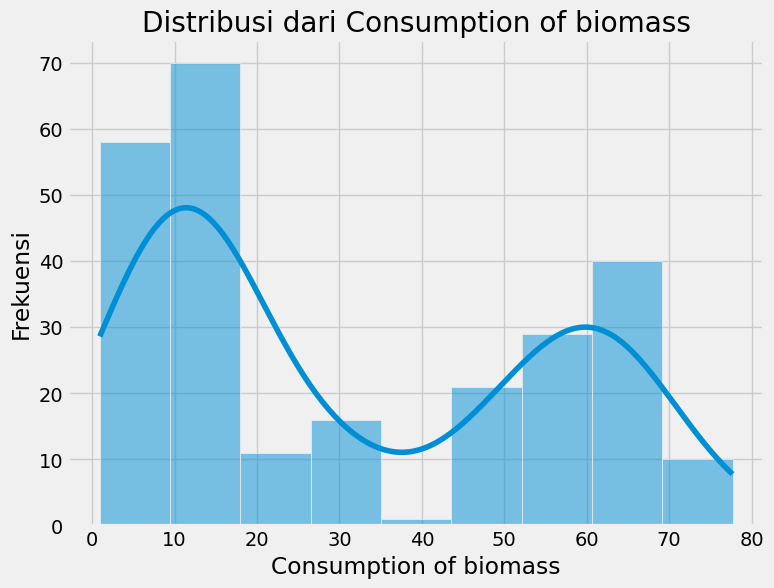

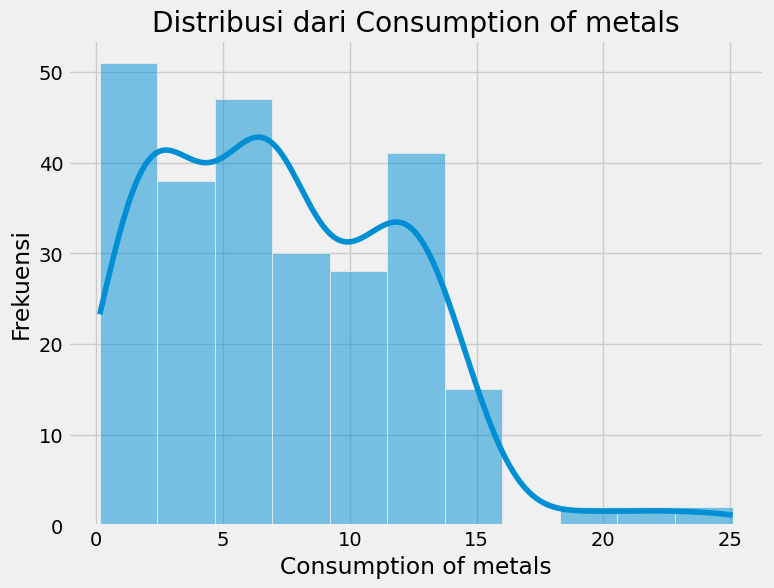

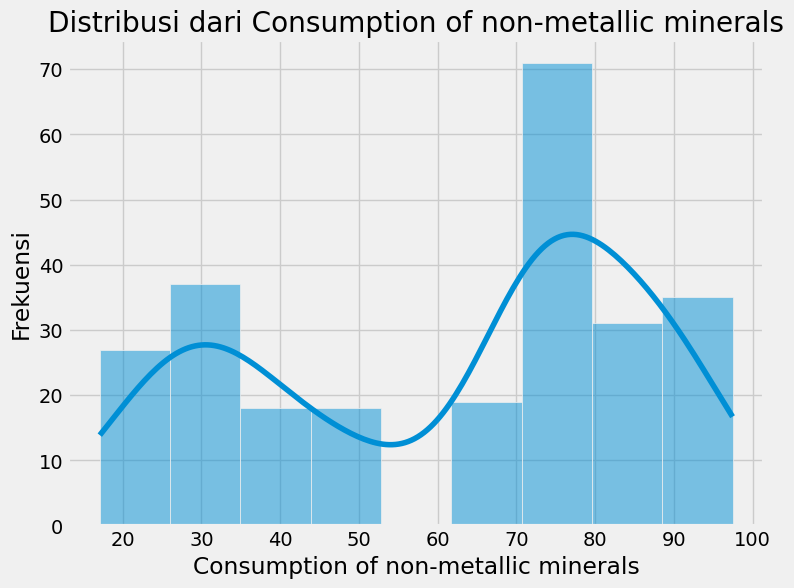

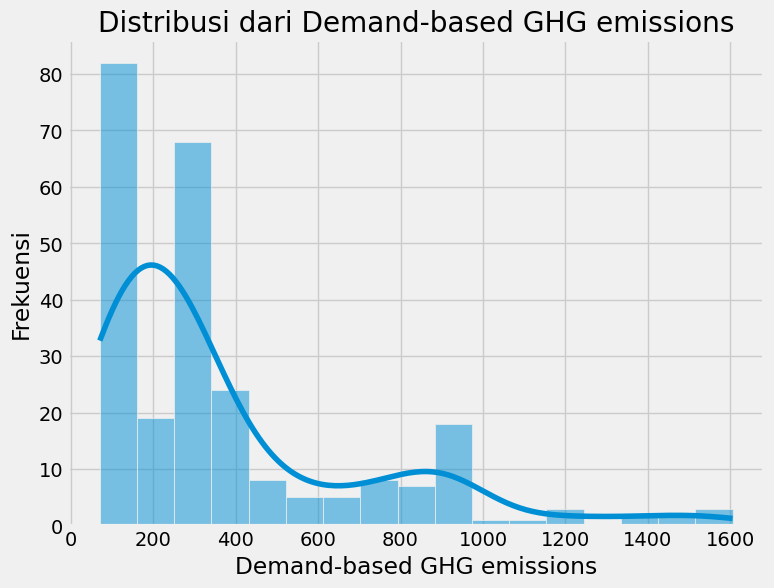

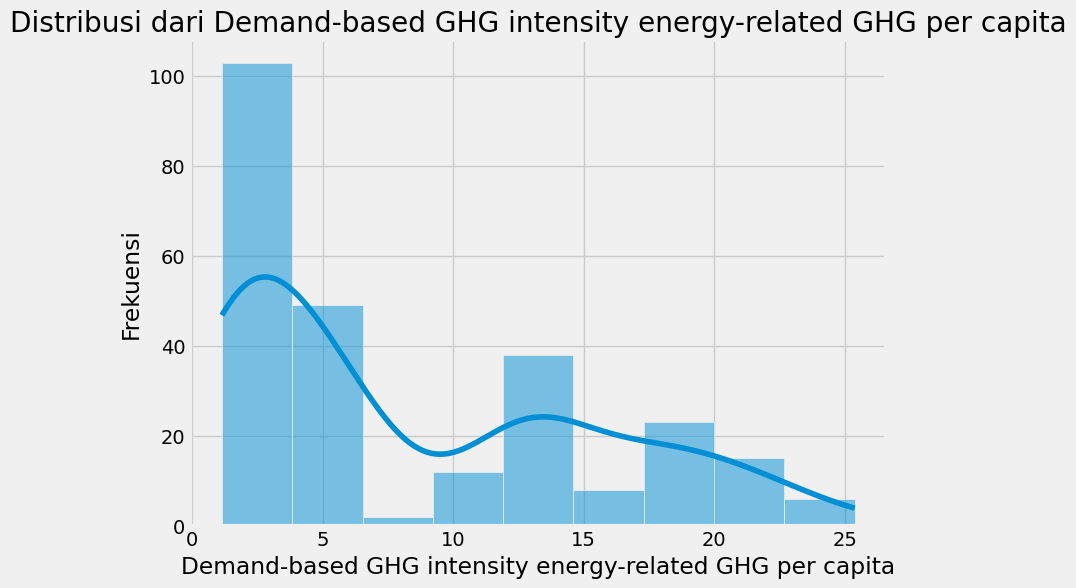

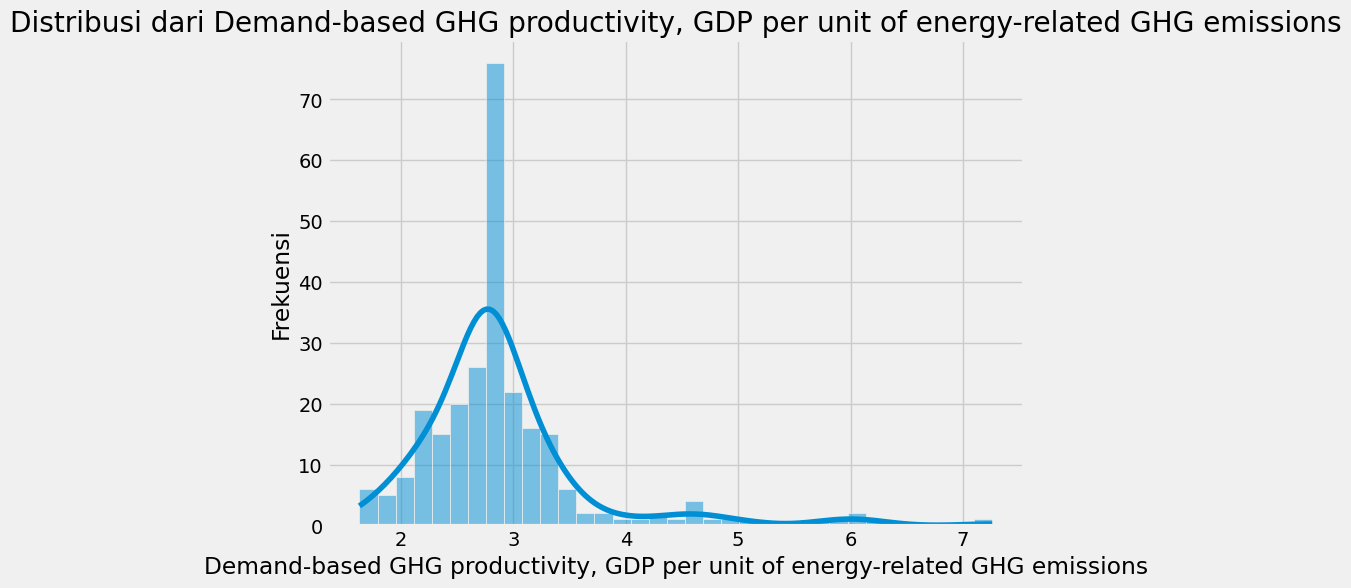

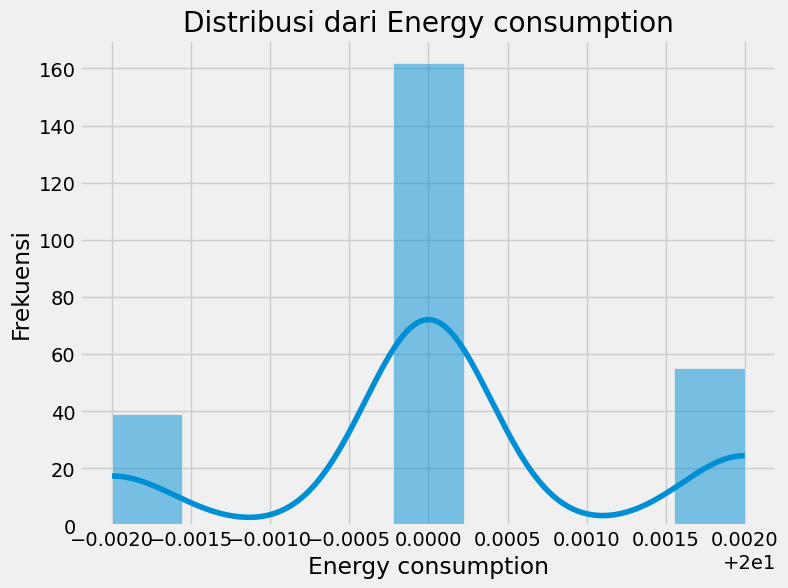

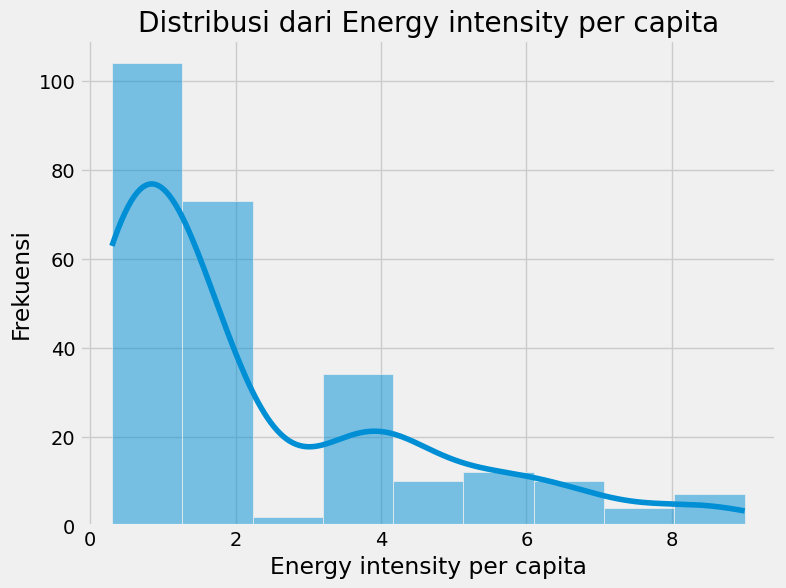

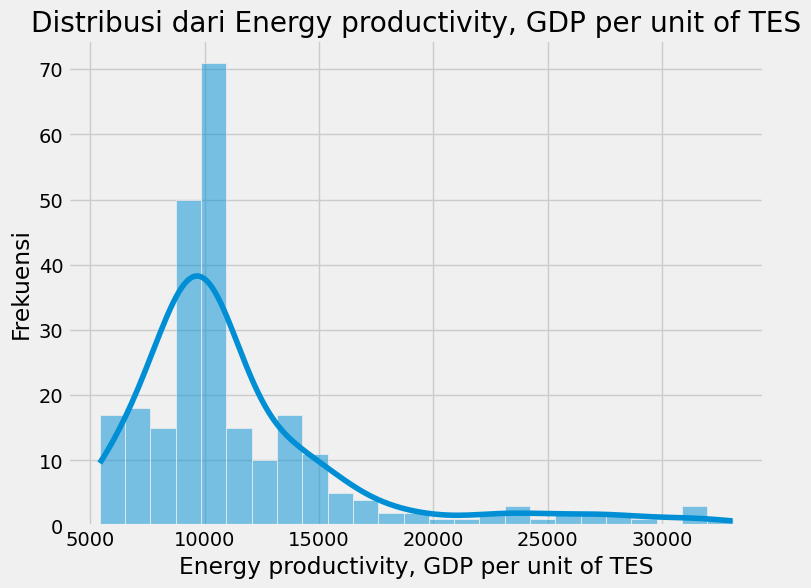

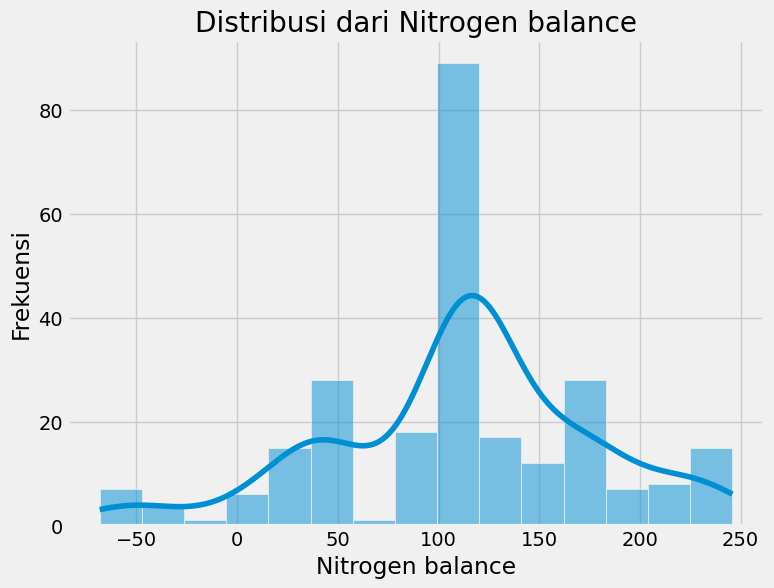

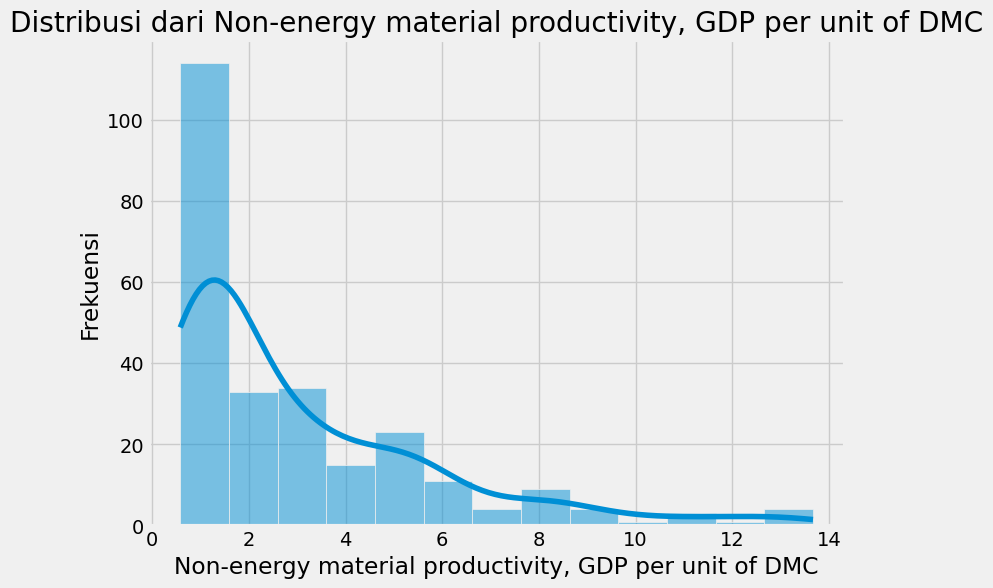

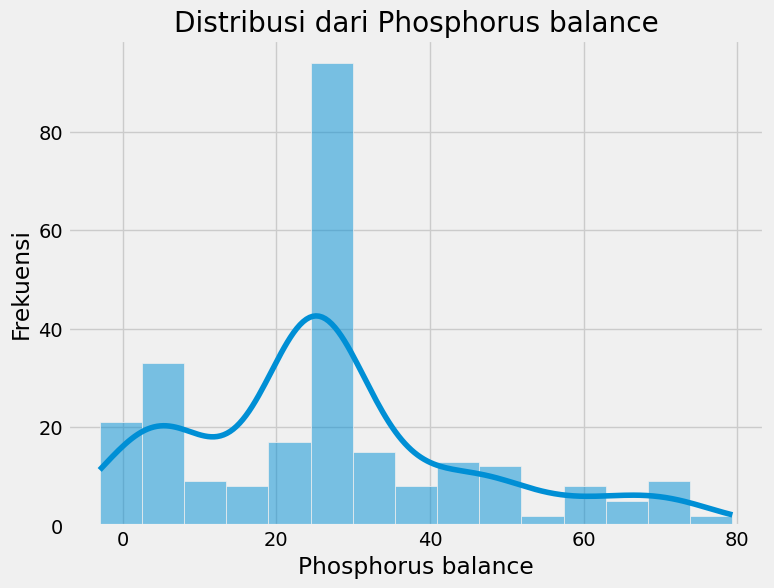

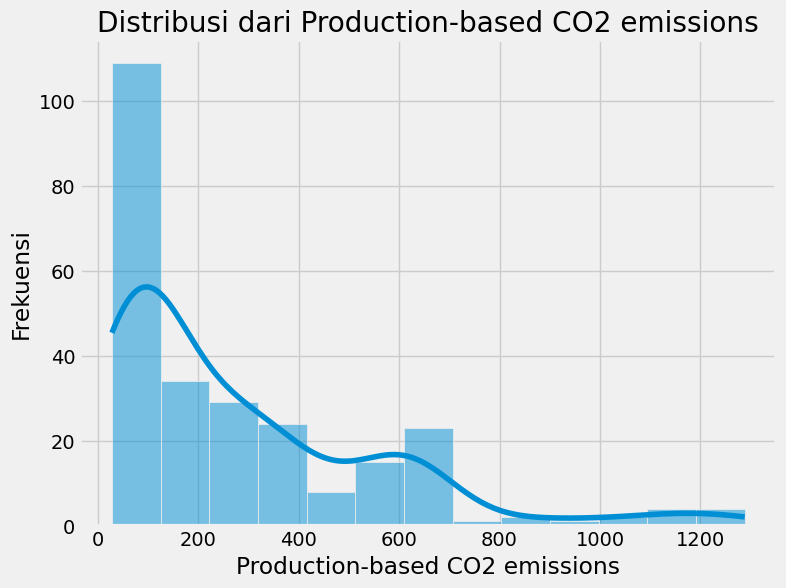

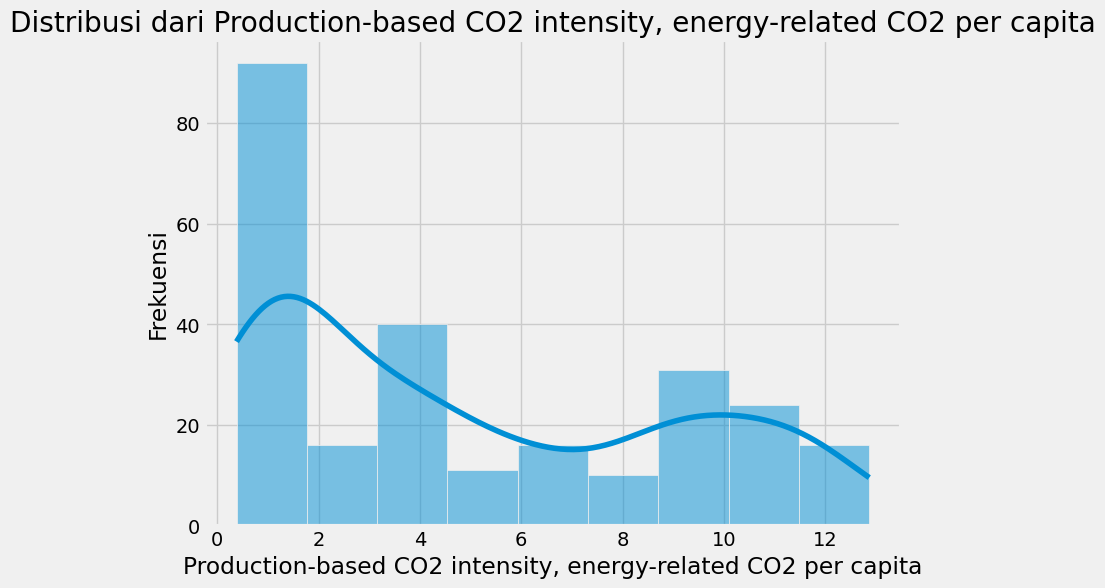

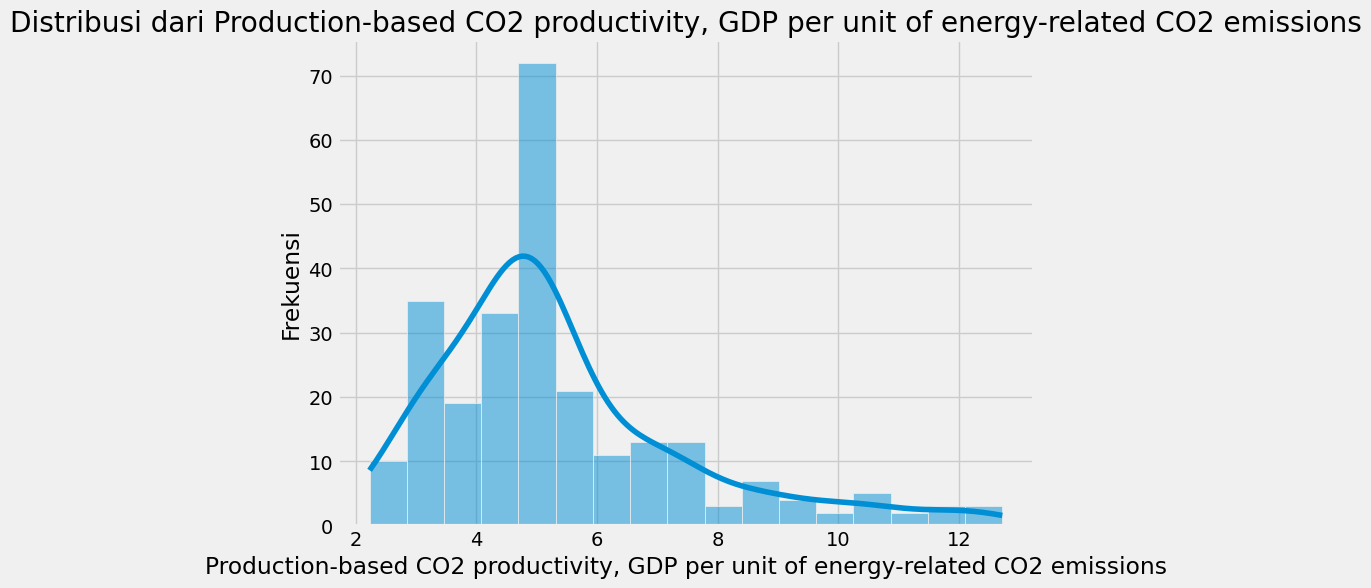

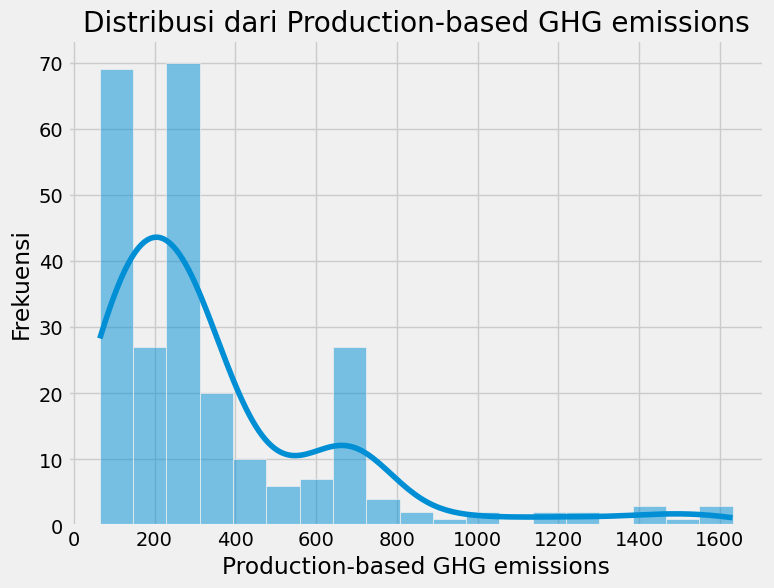

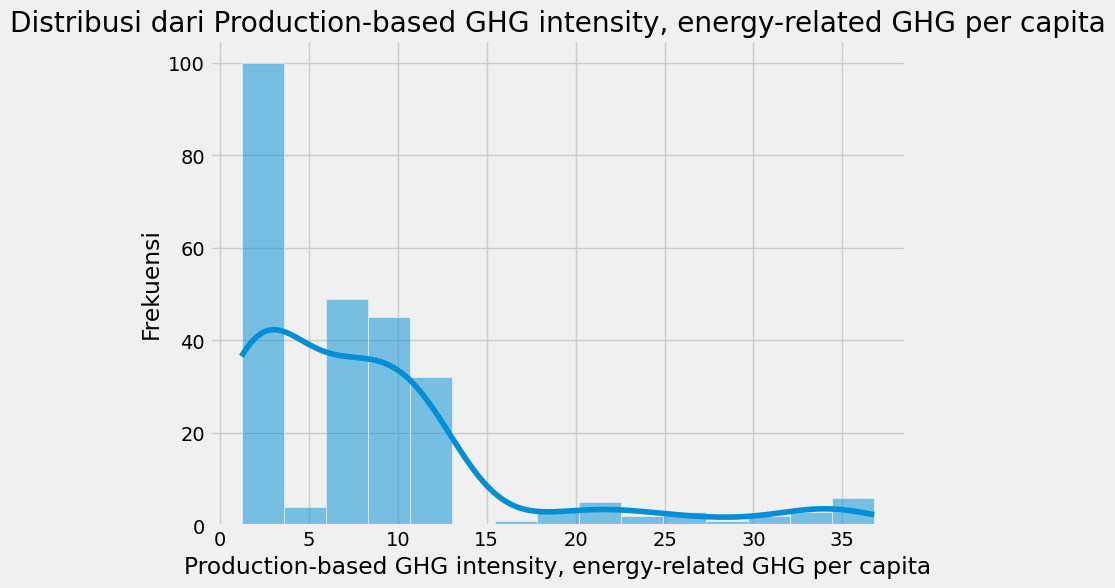

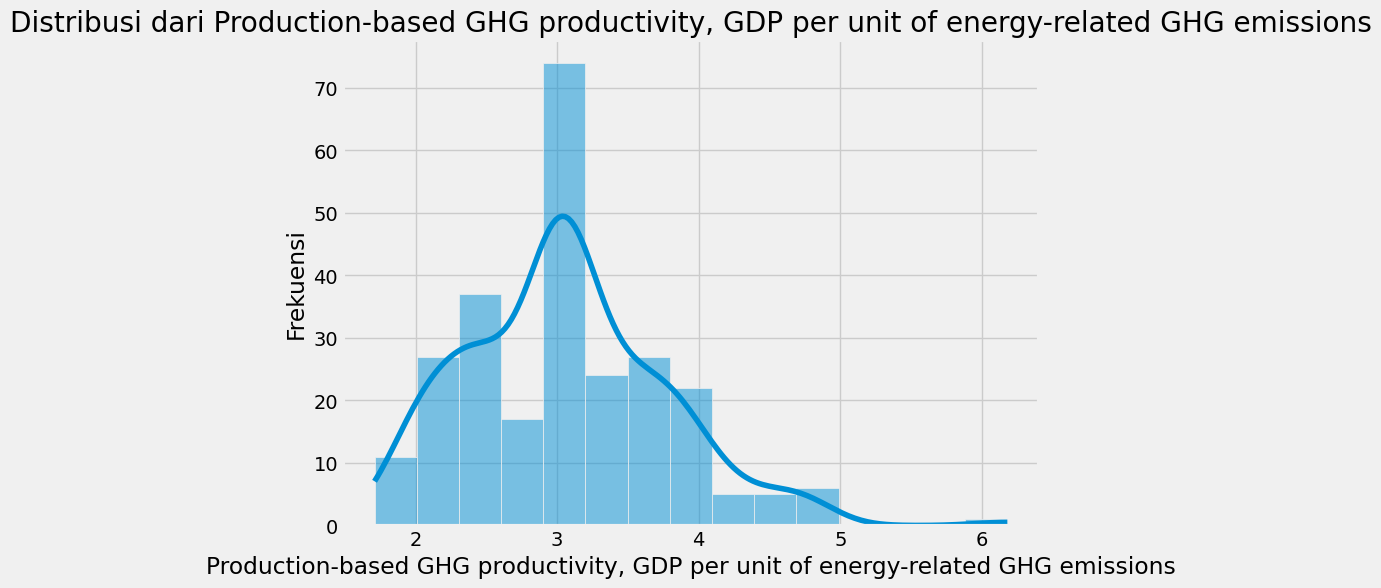

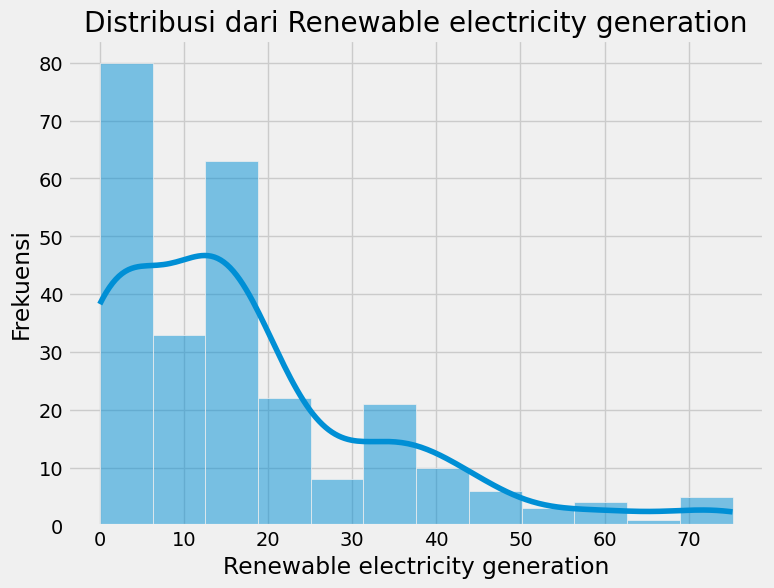

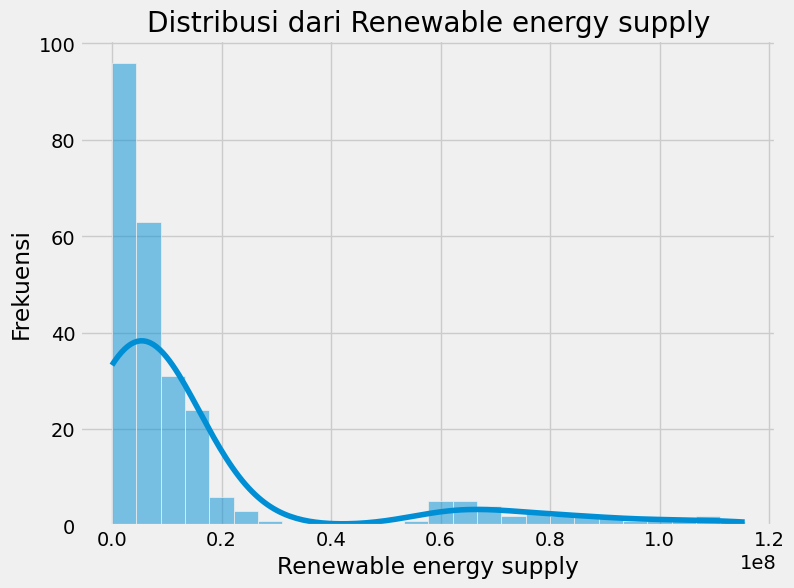

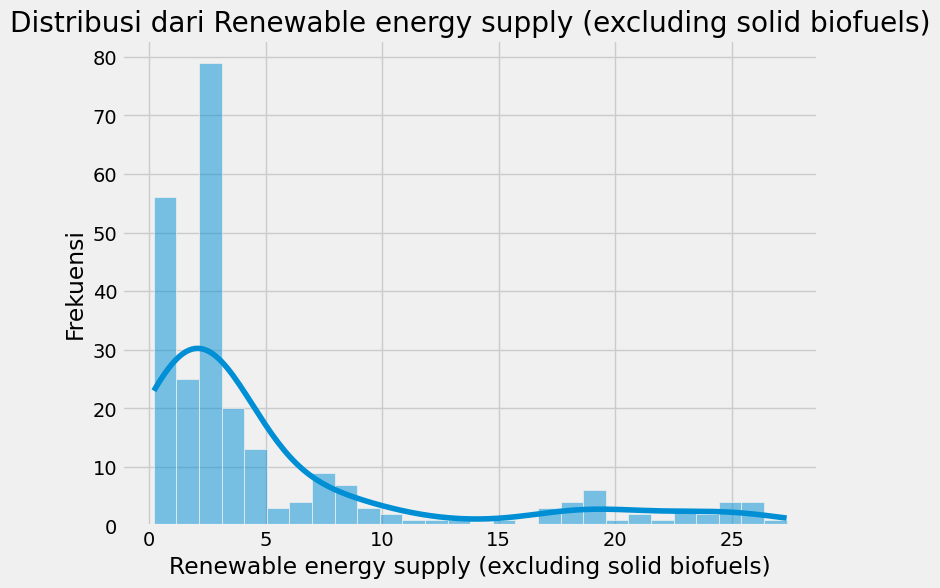

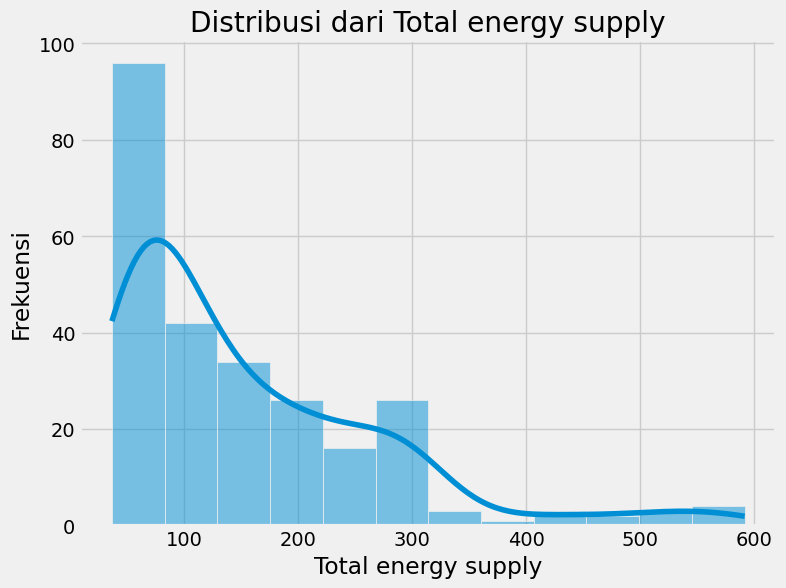

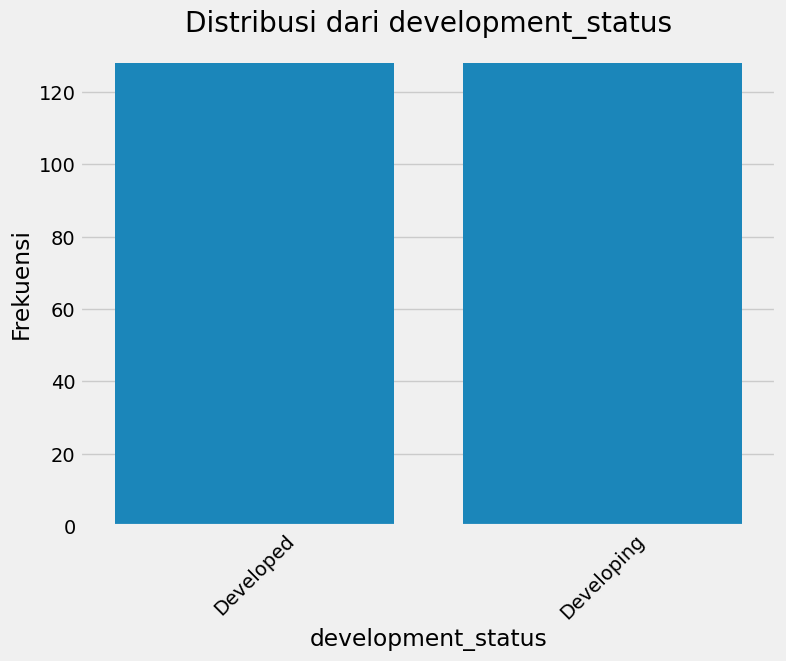

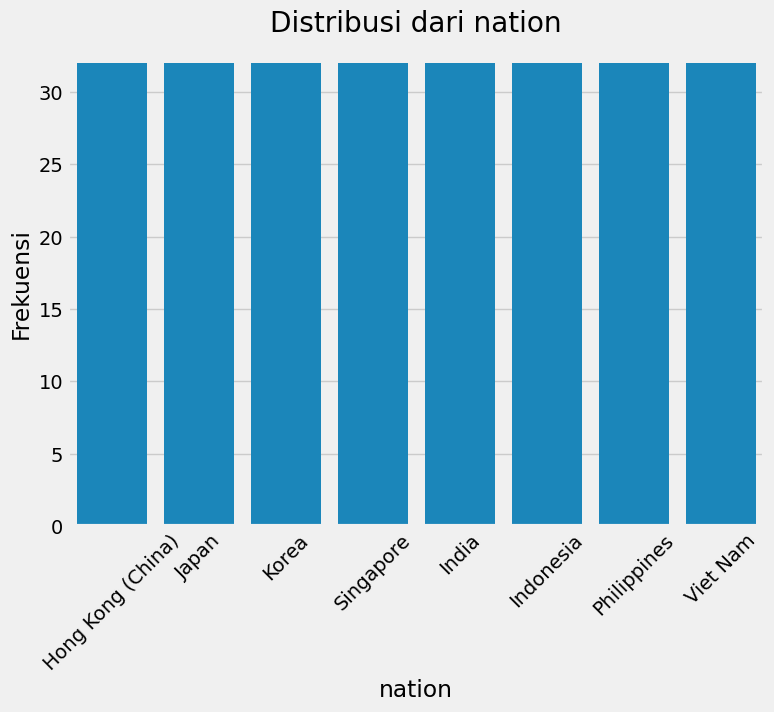

In [ ]:
# mengulangi setiap kolom numerik dan memplot distribusinya
for column in df_cleaned.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df_cleaned[column], kde=True)
  plt.title(f'Distribusi dari {column}')
  plt.xlabel(column)
  plt.ylabel('Frekuensi')
  plt.show()
  print('\n')

# mengulangi setiap kolom kategorikal dan memplot distribusinya
for column in df_cleaned.select_dtypes(include=['object']).columns:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=column, data=df_cleaned)
  plt.title(f'Distribusi dari {column}')
  plt.xlabel(column)
  plt.ylabel('Frekuensi')
  plt.xticks(rotation=45)  # memutar label sumbu x jika diperlukan
  plt.show()
  print('\n')


***Melalui analisis distribusi dari kolom numerik dan kategorikal, kita dapat memperoleh pemahaman yang lebih baik tentang pola data,***


*   Menunjukkan pada `Production-based CO2 emissions`. Distribusi data cenderung miring ke kanan, menunjukkan bahwa sebagian besar emisi CO2 berbasis produksi relatif rendah, dengan beberapa emisi yang jauh lebih tinggi. Sebagian besar emisi berada di bawah 200, dan hanya ada beberapa emisi di atas 800.
*   Menujukan pada `nation`. Tidak ada negara yang memiliki jumlah data lebih sedikit atau lebih banyak dibandingkan negara lainnya. Hal ini menunjukkan bahwa data tersebut cukup seimbang dan tidak ada bias yang signifikan dalam distribusi negara.



## 5. Korelasi antar-fitur

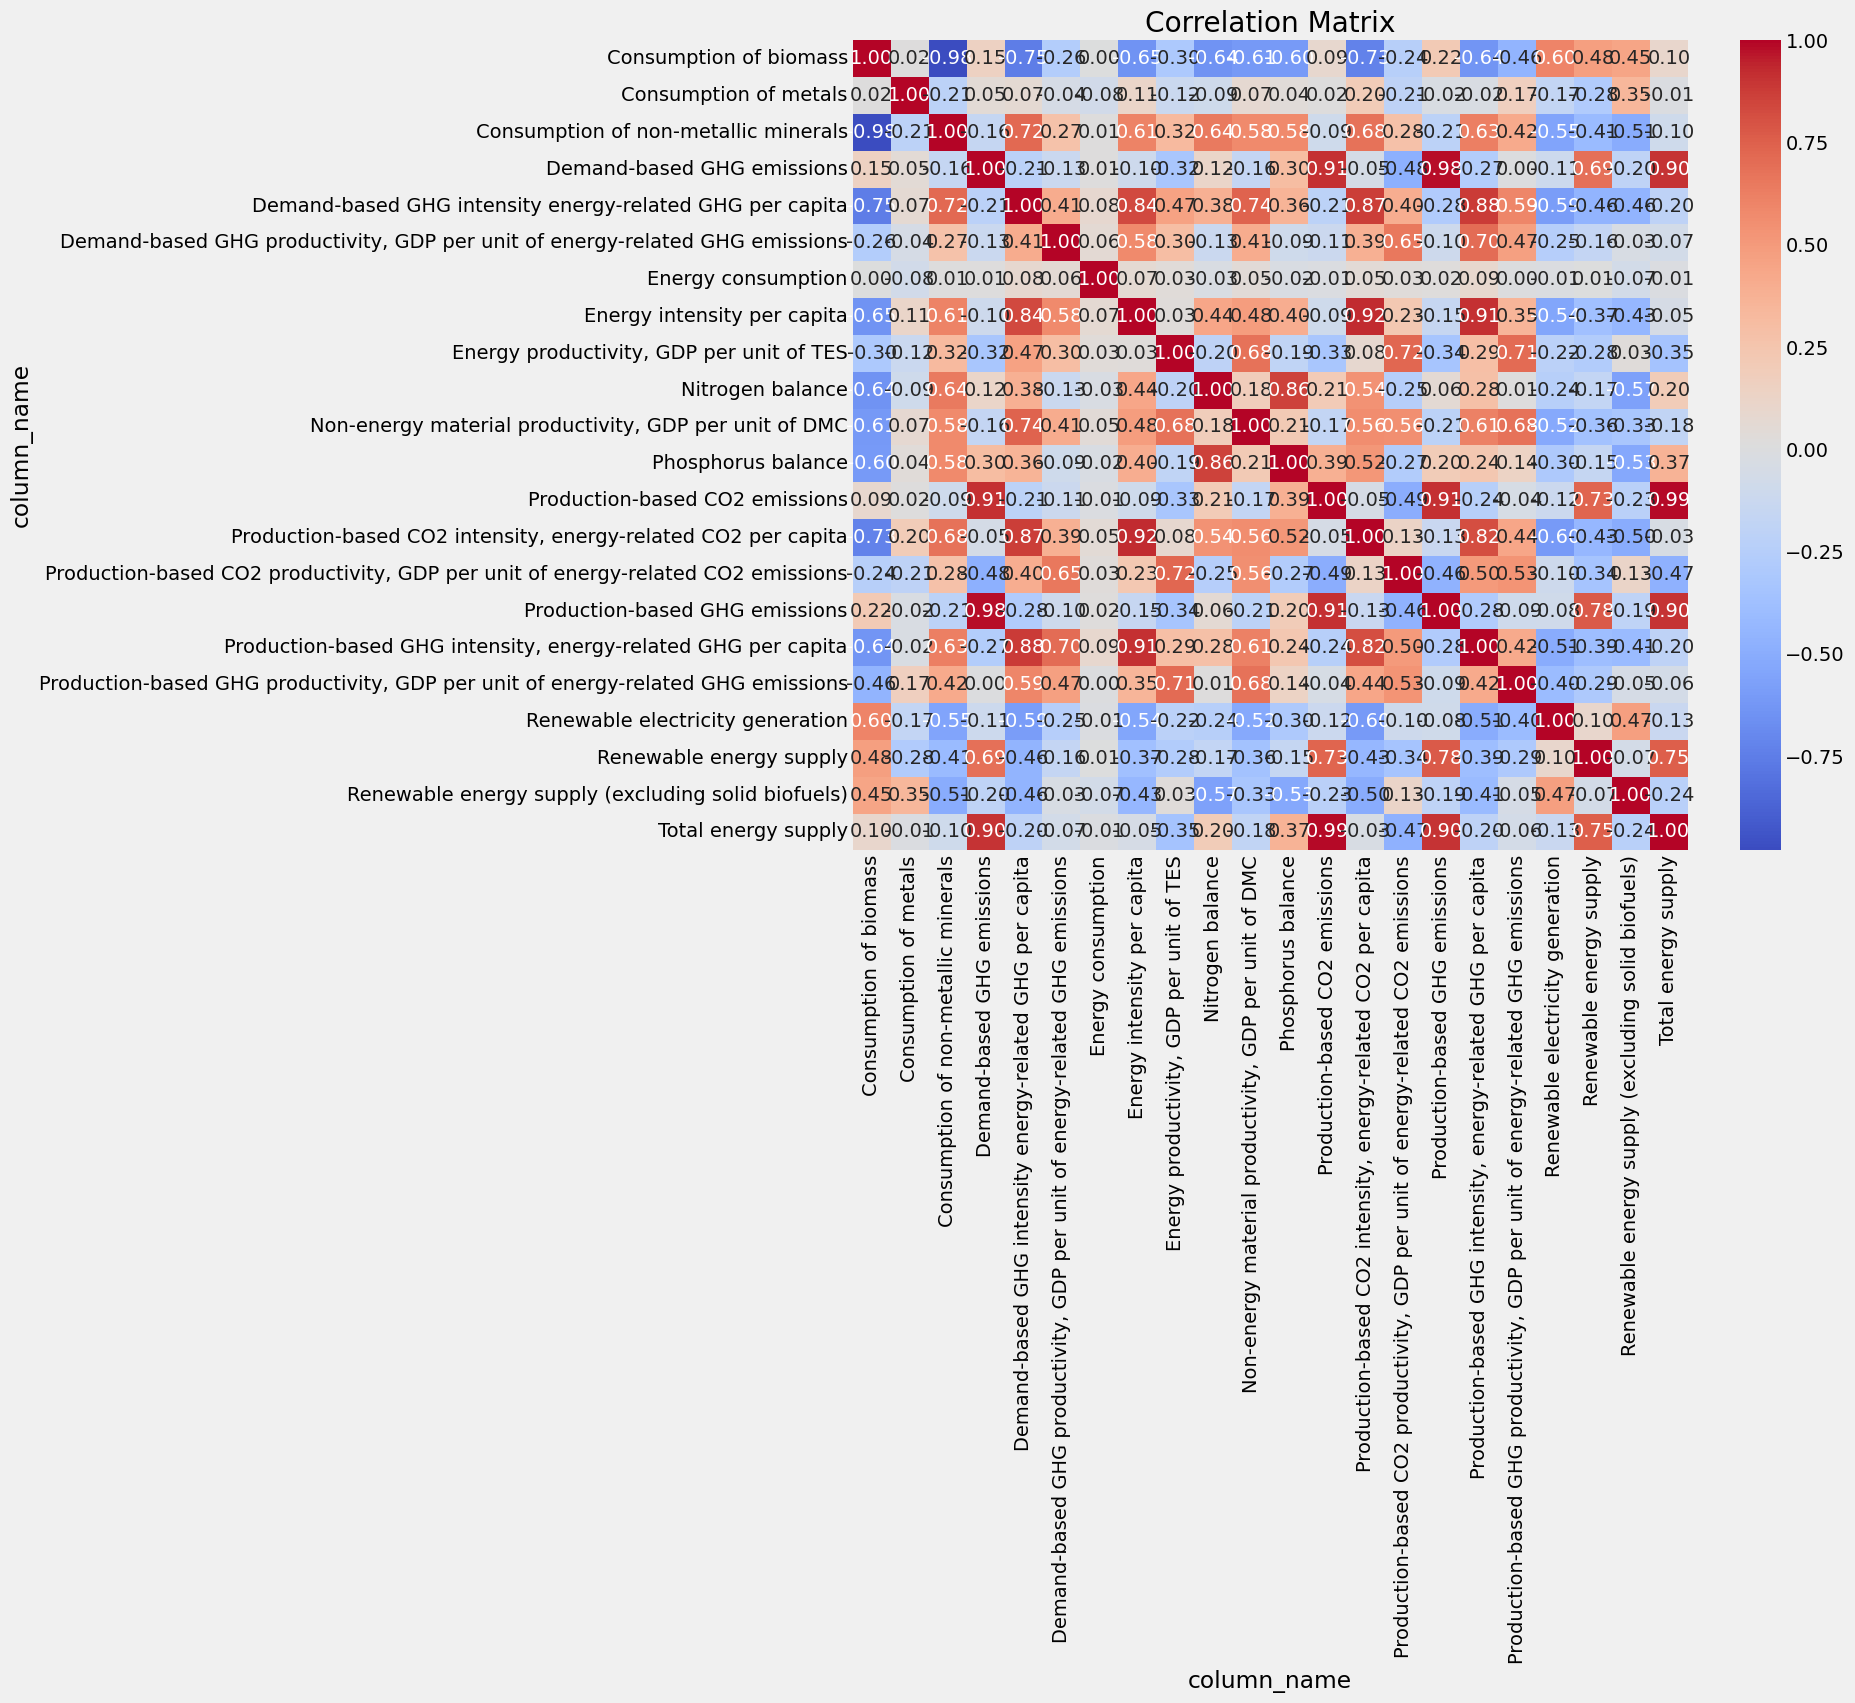

In [ ]:
# menghitung korelasi antar fitur numerik
correlation_matrix = df_cleaned.corr(numeric_only=True)

# visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Heatmap matriks korelasi menunjukkan pola yang kompleks dan saling terkait antara berbagai variabel, seperti

*   Korelasi sebesar 0,92 antara Production-based CO2 emissions dan Total energy supply menunjukkan hubungan yang sangat kuat dan positif antara kedua variabel tersebut.

*   Korelasi sebesar -0,97 antara Consumption of non-metallic minerals dan Consumption of biomass menunjukkan hubungan yang sangat kuat dan negatif antara kedua variabel tersebut.



# **C.3 Feature Engineering**

## 1. Mengidentifikasi Tren Production-based CO2 emissions per tahun di setiap negara

In [ ]:
# mengelompokkan data berdasarkan negara dan tahun, kemudian menghitung rata-rata emisi CO2
# menyertakan 'development_status' dalam pengelompokan agar tetap ada dalam DataFrame yang dihasilkan
df_trend = df_cleaned.groupby(['nation', 'development_status', df_cleaned.index])['Production-based CO2 emissions'].mean().reset_index()

# mengganti nama kolom indeks menjadi 'period' untuk kejelasan
df_trend.rename(columns={df_trend.columns[2]: 'period'}, inplace=True) # Rename the third column to 'period'

# menghitung perubahan emisi CO2 tahun ke tahun untuk setiap negara
df_trend['CO2_Change'] = df_trend.groupby('nation')['Production-based CO2 emissions'].diff()

# membuat kolom baru untuk mengkategorikan tren
df_trend['CO2_Trend'] = 'Stable'
df_trend.loc[df_trend['CO2_Change'] > 0, 'CO2_Trend'] = 'Increasing'
df_trend.loc[df_trend['CO2_Change'] < 0, 'CO2_Trend'] = 'Decreasing'

***Feature ini dibuat untuk menganalisis perubahan emisi CO2 dari waktu ke waktu berdasarkan negara dan status pembangunan, guna memahami tren emisi yang dapat mempengaruhi kebijakan lingkungan dan strategi keberlanjutan di masing-masing negara, serta untuk mengidentifikasi pola peningkatan atau penurunan emisi yang mungkin berhubungan dengan faktor-faktor pembangunan ekonomi dan teknologi.***

In [ ]:
# menampilkan 12 data teratas dari df_trend yang hanya mencakup negara dengan development_status = 'Developed', disusun berdasarkan periode dari tiga tahun terakhir
df_trend[(df_trend['development_status'] == 'Developed')].sort_values(by=['period'], ascending=False).head(12)

,nation,development_status,period,Production-based CO2 emissions,CO2_Change,CO2_Trend
223,Singapore,Developed,2021,76.84,3.19,Increasing
159,Korea,Developed,2021,345.42,7.30,Increasing
127,Japan,Developed,2021,542.49,4.08,Increasing
31,Hong Kong (China),Developed,2021,59.22,-0.14,Decreasing
30,Hong Kong (China),Developed,2020,59.36,-14.27,Decreasing
158,Korea,Developed,2020,338.12,-24.98,Decreasing
222,Singapore,Developed,2020,73.66,-2.40,Decreasing
126,Japan,Developed,2020,538.41,-31.32,Decreasing
221,Singapore,Developed,2019,76.06,-0.00,Decreasing
125,Japan,Developed,2019,569.73,-20.32,Decreasing


***Data menunjukkan bahwa emisi CO2 produksi di negara-negara maju seperti Jepang, Korea, dan Singapura mengalami tren peningkatan pada tahun 2021, meskipun Hong Kong menunjukkan penurunan kecil dalam emisi selama periode yang sama, mencerminkan perbedaan dalam kebijakan dan praktik lingkungan di antara negara-negara tersebut.***

In [ ]:
# Menampilkan 12 entri teratas dari tren emisi CO2 berdasarkan development_status = 'Developing', disusun berdasarkan periode dari tiga tahun terakhir.
df_trend[(df_trend['development_status'] == 'Developing')].sort_values(by=['period'], ascending=False).head(12)

,nation,development_status,period,Production-based CO2 emissions,CO2_Change,CO2_Trend
255,Viet Nam,Developing,2021,464.21,-20.98,Decreasing
191,Philippines,Developing,2021,166.07,10.66,Increasing
95,Indonesia,Developing,2021,387.41,16.61,Increasing
63,India,Developing,2021,1267.57,113.66,Increasing
62,India,Developing,2020,1153.90,-112.98,Decreasing
190,Philippines,Developing,2020,155.41,-13.29,Decreasing
254,Viet Nam,Developing,2020,485.19,18.03,Increasing
94,Indonesia,Developing,2020,370.81,-26.78,Decreasing
253,Viet Nam,Developing,2019,467.17,79.95,Increasing
93,Indonesia,Developing,2019,397.59,26.56,Increasing


***Menunjukkan bahwa pada tahun 2021, emisi CO2 di negara berkembang memiliki variasi yang signifikan: sementara Viet Nam mencatat penurunan emisi, negara seperti India mengalami peningkatan yang cukup besar, yang menunjukkan tantangan dalam mencapai keberlanjutan dan pengurangan emisi di negara-negara berkembang meskipun terdapat penurunan di beberapa negara lainnya.***

## 2. Mengukur intensitas emisi CO2 berdasarkan total pasokan energi

In [ ]:
# menghitung emisi CO2 per unit pasokan energi dengan membagi emisi CO2 berbasis produksi dengan total pasokan energi.
df_cleaned['CO2_Emissions_per_Unit_of_Energy_Supply'] = df_cleaned['Production-based CO2 emissions'] / df_cleaned['Total energy supply']

***Feature ini dibuat untuk mengevaluasi efisiensi emisi karbon dengan membandingkan emisi CO2 yang dihasilkan per unit total pasokan energi, sebagai upaya untuk memahami dampak lingkungan dari konsumsi energi dan untuk mendukung kebijakan pengurangan emisi di negara-negara yang berbeda.***

In [ ]:
# mengambil data emisi CO2 dan pasokan energi untuk negara-negara dengan status maju
# mengelompokkan data berdasarkan 'development_status'
# dan menampilkan 12 entri teratas disortir berdasarkan kolom 'period' 3 tahun terakhir
df_cleaned[(df_cleaned['development_status'] == 'Developed')][['development_status','nation', 'Production-based CO2 emissions', 'Total energy supply', 'CO2_Emissions_per_Unit_of_Energy_Supply']].sort_values(by=['period'], ascending=False).groupby('development_status').head(12)

column_name,development_status,nation,Production-based CO2 emissions,Total energy supply,CO2_Emissions_per_Unit_of_Energy_Supply
period,,,,,
2021,Developed,Singapore,76.84,112.59,0.68
2021,Developed,Korea,345.42,219.53,1.57
2021,Developed,Japan,542.49,239.79,2.26
2021,Developed,Hong Kong (China),59.22,50.02,1.18
2020,Developed,Singapore,73.66,109.03,0.68
2020,Developed,Korea,338.12,207.15,1.63
2020,Developed,Japan,538.41,229.65,2.34
2020,Developed,Hong Kong (China),59.36,49.98,1.19
2019,Developed,Singapore,76.06,110.00,0.69


***Menunjukkan bahwa pada tahun 2021, Korea dan Jepang memiliki nilai CO2 Emissions per Unit of Energy Supply yang lebih tinggi dibandingkan dengan negara-negara maju lainnya, menandakan bahwa meskipun mereka memiliki pasokan energi yang lebih tinggi, efisiensi dalam menghasilkan emisi CO2 per unit energi masih menjadi tantangan bagi kedua negara tersebut.***

In [ ]:
# mengambil data emisi CO2 dan pasokan energi untuk negara-negara dengan status berkembang
# mengelompokkan data berdasarkan 'development_status'
# dan menampilkan 12 entri teratas disortir berdasarkan kolom 'period' 3 tahun terakhir
df_cleaned[(df_cleaned['development_status'] == 'Developing')][['development_status','nation', 'Production-based CO2 emissions', 'Total energy supply', 'CO2_Emissions_per_Unit_of_Energy_Supply']].sort_values(by=['period'], ascending=False).groupby('development_status').head(12)

column_name,development_status,nation,Production-based CO2 emissions,Total energy supply,CO2_Emissions_per_Unit_of_Energy_Supply
period,,,,,
2021,Developing,Viet Nam,464.21,213.22,2.18
2021,Developing,Philippines,166.07,107.40,1.55
2021,Developing,Indonesia,387.41,204.26,1.90
2021,Developing,India,1267.57,591.76,2.14
2020,Developing,Viet Nam,485.19,217.76,2.23
2020,Developing,Philippines,155.41,103.86,1.50
2020,Developing,Indonesia,370.81,199.23,1.86
2020,Developing,India,1153.90,543.09,2.12
2019,Developing,Viet Nam,467.17,214.88,2.17


***Menunjukkan bahwa pada tahun 2021, India memiliki CO2 Emissions per Unit of Energy Supply tertinggi di antara negara-negara berkembang, dengan nilai 9.26, yang mengindikasikan bahwa meskipun total pasokan energi relatif sama di semua negara, India menghasilkan emisi CO2 yang jauh lebih tinggi per unit energi, mencerminkan tantangan signifikan dalam efisiensi energi dan pengelolaan emisi.***